<a href="https://colab.research.google.com/github/orellanomariana/Proyectos_DS/blob/main/ProyectoDS_ParteII_Orellano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analisis de Dataset  de Ventas

### Objetivo del Proyecto

El objetivo de este proyecto de data science es analizar el comportamiento de compra de los clientes en una plataforma minorista en línea utilizando un conjunto de datos de Kaggle. Este análisis busca incrementar las ventas, captar nuevos clientes, y mejorar la experiencia de compra para fomentar la fidelidad del cliente. Específicamente, se pretende:

1. Predecir los montos de compra
2. Predecir si el cliente si suscribiria o no al newsletter
3. Segmentar a los clientes para campañas de marketing personalizadas.
4. Predecir las formas de Pago para poder mejorarlas ofreciendo promociones.
5. Predecir las calificaciones de las reseñas (Rating Review).






El proyecto tiene varios objetivos clave:

1. **Incrementar las ventas:** Optimizar estrategias de ventas y promociones basadas en las preferencias de los clientes.
2. **Captar nuevos clientes:** Desarrollar estrategias para atraer nuevos clientes potenciales identificando patrones de comportamiento.
3. **Mejorar la experiencia de compra:** Mejorar las formas de pago para hacer la experiencia de compra más conveniente.
4. **Predecir el Rating Review:** Identificar y abordar problemas antes de que afecten la satisfacción del cliente.
5. **Predecir los montos de compra:** Anticipar montos de compras futuras para una mejor planificación.
6. **Segmentar a los clientes:** Crear campañas de marketing efectivas y personalizadas basadas en las preferencias y comportamientos de los clientes.

### Contexto del Conjunto de Datos

El conjunto de datos de Kaggle incluye registros de transacciones de consumidores, formas de envío y pago, calificaciones de reseñas y montos de compra, entre otros datos.

Para lograr estos objetivos, primero se realizará una limpieza exhaustiva del conjunto de datos, eliminando valores cero y nulos (NaN), normalizando columnas y descartando aquellas que no son de interés para el análisis. Posteriormente, se llevará a cabo un análisis exploratorio de los datos para evaluar diversas hipótesis y comprender en profundidad las características del conjunto de datos.





# Importacion de librerias y Dataset


Cargar de librerias

In [203]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score





<ipython-input-203-9d72e09310a3>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Carga de Data

In [204]:
url = "https://raw.githubusercontent.com/orellanomariana/datasets/main/shopping_data.csv"
df_shopping = pd.read_csv(url, sep=";")

df_shopping.set_index(df_shopping.columns[0], inplace=True)

df_shopping.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Country,Location,Size,Color,Season,Year,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Discount value
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Female,Blouse,Clothing,53,USA,Kentucky,L,Gray,Winter,2023,3.1,Yes,Express,No,nothing,Debit Card,0.0
2,19,Male,Sweater,Clothing,64,USA,Maine,L,Maroon,Winter,2023,3.1,Yes,Express,Yes,nothing,Cash,10.0
3,50,Female,Jeans,Clothing,73,USA,Massachusetts,S,Maroon,Spring,2023,3.1,Yes,Free Shipping,No,nothing,Credit Card,0.0
4,2,Male,Sandals,Footwear,90,USA,Rhode Island,M,Maroon,Spring,2023,3.5,Yes,Next Day Air,No,nothing,Cash,NaN
5,45,F,Blouse,Clothing,49,USA,Oregon,M,Turquoise,Spring,2023,2.7,Yes,Free Shipping,No,nothing,Cash,0.0




```
Definicion de las columnas:
0. Gender: Genero del cliente
1. Age: Edad del cliente
2.Item Puchased: nombre del articulo comprado
3.Category: Categoría del artículo comprado (p. ej., Ropa, Calzado, Accesorios).
4.Purchase Amount (USD) : importe pagado en dolares
5.Country : Pais de la compra
6. Location: Ubicación dentro del país de compra.
7. Size: talle del articulo comprado               
8. Color:  color del articulo comprado
9. Season: temporada en la que se realizó la compra
10. Year: año      
11. Review Rating: Calificación proporcionada por el cliente sobre el artículo adquirido.    
12. Subscription Status: Indica si el cliente está suscrito a un servicio
13. Shipping Type: Tipo de envío seleccionado por el cliente     
14. Promo Code Used: Indica si se utilizó un código de promoción para la compra.   
15. Previous Purchases: Número de compras anteriores realizadas por el cliente
16. Payment Method: Método de pago utilizado para la compra.
17. Discount value: Valor del descuento aplicado a la compra  
```




# Análisis exporatorio de datos (EDA)


In [205]:
df_shopping.shape

(3900, 18)

In [206]:
df_shopping.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 1 to 3900
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    3900 non-null   int64  
 1   Gender                 3705 non-null   object 
 2   Item Purchased         3900 non-null   object 
 3   Category               3900 non-null   object 
 4   Purchase Amount (USD)  3900 non-null   int64  
 5   Country                3900 non-null   object 
 6   Location               3900 non-null   object 
 7   Size                   3900 non-null   object 
 8   Color                  3900 non-null   object 
 9   Season                 3900 non-null   object 
 10  Year                   3900 non-null   int64  
 11  Review Rating          3900 non-null   float64
 12  Subscription Status    3900 non-null   object 
 13  Shipping Type          3900 non-null   object 
 14  Promo Code Used        3900 non-null   object 
 15  Previous 

Existen valores nulos en las columnas Gender y Discount Value, mostrando un Head de 20 tambien se observan edades en 0


In [207]:
df_shopping.describe()

,Age,Purchase Amount (USD),Year,Review Rating,Discount value
count,3900.000000,3900.000000,3900.0,3900.000000,2450.000000
mean,41.018462,59.764359,2023.0,3.749949,6.853061
std,18.520409,23.685392,0.0,0.716223,11.506334
min,0.000000,20.000000,2023.0,2.500000,0.000000
25%,28.000000,39.000000,2023.0,3.100000,0.000000
50%,42.000000,60.000000,2023.0,3.700000,0.000000
75%,56.000000,81.000000,2023.0,4.400000,10.000000
max,70.000000,100.000000,2023.0,5.000000,50.000000


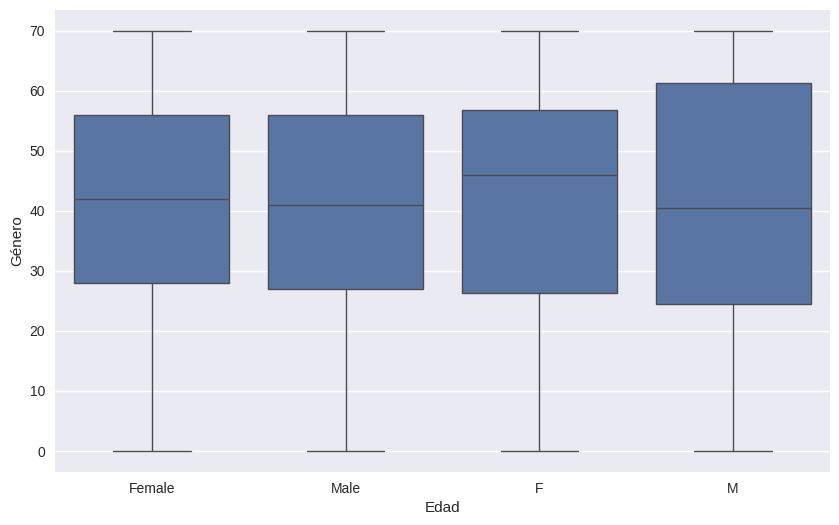

In [208]:
# Crear el boxplot con Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=df_shopping, showfliers=True)
plt.xlabel('Edad')
plt.ylabel('Género')
plt.show()



<ipython-input-209-76ec7e1f915e>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_shopping, x='Age', y='Gender', alpha=0.7, palette='viridis')


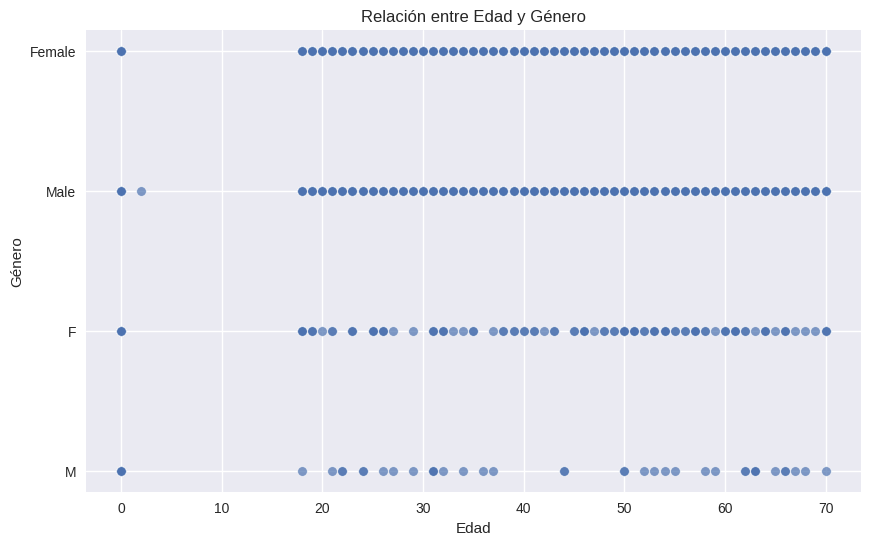

In [209]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_shopping, x='Age', y='Gender', alpha=0.7, palette='viridis')
plt.xlabel('Edad')
plt.ylabel('Género')
plt.title('Relación entre Edad y Género')
plt.show()

Realizando estos dos graficos podemos observar:


*   Existen valores 0 para las edades
*   Existe un Outlier para sexo identificado como MALE
*   No hay una unica forma de identificar el sexo algunas filas contiene "Male" otras "M"








# LIMPIEZA DEL DATAFRAME

Creo una copia del DF para realizar la limpieza

In [210]:
df_shopping_cl = df_shopping.copy()
df_shopping_cl.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Country,Location,Size,Color,Season,Year,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Discount value
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Female,Blouse,Clothing,53,USA,Kentucky,L,Gray,Winter,2023,3.1,Yes,Express,No,nothing,Debit Card,0.0
2,19,Male,Sweater,Clothing,64,USA,Maine,L,Maroon,Winter,2023,3.1,Yes,Express,Yes,nothing,Cash,10.0
3,50,Female,Jeans,Clothing,73,USA,Massachusetts,S,Maroon,Spring,2023,3.1,Yes,Free Shipping,No,nothing,Credit Card,0.0
4,2,Male,Sandals,Footwear,90,USA,Rhode Island,M,Maroon,Spring,2023,3.5,Yes,Next Day Air,No,nothing,Cash,NaN
5,45,F,Blouse,Clothing,49,USA,Oregon,M,Turquoise,Spring,2023,2.7,Yes,Free Shipping,No,nothing,Cash,0.0


Reemplazo 0 por Nan en la columna AGE

In [211]:
df_shopping_cl['Age'] = df_shopping_cl['Age'].replace(0, np.nan)
na_count = df_shopping_cl['Age'].isnull().sum()

print(f"Number of NaN values in 'Age' column: {na_count}")

Number of NaN values in 'Age' column: 275


Reemplazo de Nan por Media en la columna AGE

In [212]:
mean_age_rounded = round(df_shopping_cl['Age'].mean())
df_shopping_cl['Age'].fillna(mean_age_rounded, inplace=True)



Reemplazo de Outlier por Media en la columna AGE

In [213]:

df_shopping_cl.loc[df_shopping_cl['Age'] < 10, 'Age'] = mean_age_rounded
df_shopping_cl['Age'] = df_shopping_cl['Age'].astype(int) #convierto edad en integrer
df_shopping_cl.head(20)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Country,Location,Size,Color,Season,Year,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Discount value
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Female,Blouse,Clothing,53,USA,Kentucky,L,Gray,Winter,2023,3.1,Yes,Express,No,nothing,Debit Card,0.0
2,19,Male,Sweater,Clothing,64,USA,Maine,L,Maroon,Winter,2023,3.1,Yes,Express,Yes,nothing,Cash,10.0
3,50,Female,Jeans,Clothing,73,USA,Massachusetts,S,Maroon,Spring,2023,3.1,Yes,Free Shipping,No,nothing,Credit Card,0.0
4,44,Male,Sandals,Footwear,90,USA,Rhode Island,M,Maroon,Spring,2023,3.5,Yes,Next Day Air,No,nothing,Cash,NaN
5,45,F,Blouse,Clothing,49,USA,Oregon,M,Turquoise,Spring,2023,2.7,Yes,Free Shipping,No,nothing,Cash,0.0
6,46,Female,Sneakers,Footwear,20,USA,Wyoming,M,White,Summer,2023,2.9,Yes,Standard,No,nothing,Debit Card,0.0
7,44,Male,Shirt,Clothing,85,USA,Montana,M,Gray,Fall,2023,3.2,Yes,Free Shipping,No,nothing,Cash,0.0
8,27,Female,Shorts,Clothing,34,USA,Louisiana,L,Charcoal,Winter,2023,3.2,Yes,Free Shipping,No,nothing,Credit Card,0.0
9,26,Female,Coat,Outerwear,97,USA,West Virginia,L,Silver,Summer,2023,2.6,Yes,Express,Yes,8,Debit Card,20.0


In [214]:

df_shopping_cl['Previous Purchases'] = df_shopping_cl['Previous Purchases'].replace('nothing', 0)
df_shopping_cl.head()


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Country,Location,Size,Color,Season,Year,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Discount value
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Female,Blouse,Clothing,53,USA,Kentucky,L,Gray,Winter,2023,3.1,Yes,Express,No,0,Debit Card,0.0
2,19,Male,Sweater,Clothing,64,USA,Maine,L,Maroon,Winter,2023,3.1,Yes,Express,Yes,0,Cash,10.0
3,50,Female,Jeans,Clothing,73,USA,Massachusetts,S,Maroon,Spring,2023,3.1,Yes,Free Shipping,No,0,Credit Card,0.0
4,44,Male,Sandals,Footwear,90,USA,Rhode Island,M,Maroon,Spring,2023,3.5,Yes,Next Day Air,No,0,Cash,NaN
5,45,F,Blouse,Clothing,49,USA,Oregon,M,Turquoise,Spring,2023,2.7,Yes,Free Shipping,No,0,Cash,0.0


Normalizacion de columna Gender

In [215]:
gender_counts = df_shopping_cl['Gender'].value_counts()

print(gender_counts)

Gender
Female    2643
Male       902
F          118
M           42
Name: count, dtype: int64


In [216]:

unique_genders = df_shopping_cl['Gender'].unique() #observo que tambien hay Nan

print(unique_genders)

['Female' 'Male' 'F' nan 'M']


Remplazo de Male por M y Female por F

In [217]:
df_shopping_cl['Gender'] = df_shopping_cl['Gender'].replace({
    'Female': 'F',
    'Male': 'M'
})

In [218]:
df_shopping_cl.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Country,Location,Size,Color,Season,Year,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Discount value
Customer ID,,,,,,,,,,,,,,,,,,
1,55,F,Blouse,Clothing,53,USA,Kentucky,L,Gray,Winter,2023,3.1,Yes,Express,No,0,Debit Card,0.0
2,19,M,Sweater,Clothing,64,USA,Maine,L,Maroon,Winter,2023,3.1,Yes,Express,Yes,0,Cash,10.0
3,50,F,Jeans,Clothing,73,USA,Massachusetts,S,Maroon,Spring,2023,3.1,Yes,Free Shipping,No,0,Credit Card,0.0
4,44,M,Sandals,Footwear,90,USA,Rhode Island,M,Maroon,Spring,2023,3.5,Yes,Next Day Air,No,0,Cash,NaN
5,45,F,Blouse,Clothing,49,USA,Oregon,M,Turquoise,Spring,2023,2.7,Yes,Free Shipping,No,0,Cash,0.0


Manejo de Nan en columa Gender Reemplazo por NI no identificado

In [219]:
df_shopping_cl['Gender'].fillna('NI', inplace=True)
unique_genders_cl = df_shopping_cl['Gender'].unique()
print(unique_genders_cl)

['F' 'M' 'NI']


Normalizacion de la columna metodo de pago

In [220]:

unique_pm_cl = df_shopping_cl['Payment Method'].unique()
print(unique_pm_cl)

['Debit Card' 'Cash' 'Credit Card' 'Bank Transfer' 'Credit' 'Debit']


In [221]:
df_shopping_cl['Payment Method'] = df_shopping_cl['Payment Method'].replace({'Debit': 'Debit Card', 'Credit': 'Credit Card'})

print(df_shopping_cl['Payment Method'].value_counts())

Payment Method
Debit Card       1406
Cash             1008
Credit Card       874
Bank Transfer     612
Name: count, dtype: int64


In [222]:
df_shopping_cl['Payment Method'].fillna('NI', inplace=True)
unique_pm_cl = df_shopping_cl['Payment Method'].unique()
print(unique_pm_cl)

['Debit Card' 'Cash' 'Credit Card' 'Bank Transfer']


In [223]:

unique_country_cl = df_shopping_cl['Country'].unique()
print(unique_country_cl)

['USA']


In [224]:
unique_Year_cl = df_shopping_cl['Year'].unique()
print(unique_Year_cl)

[2023]


In [225]:
unique_pp_cl = df_shopping_cl['Previous Purchases'].unique()
print(unique_pp_cl)

[0 '8' '4' '37' '31' '34' '36' '16' '14' '48' '18' '45' '26' '35' '49'
 '17' '3' '21' '42' '15' '29' '46' '28' '43' '20' '1' '13' '25' '12' '44'
 '39' '30' '47' '10' '41' '11' '24' '27' '40' '5' '23' '9' '19' '50' '7'
 '6' '2' '33' '22' '38' '32']


In [226]:
unique_rr_cl = df_shopping_cl['Review Rating'].unique()
print(unique_rr_cl)

[3.1 3.5 2.7 2.9 3.2 2.6 4.8 4.1 4.9 4.5 4.7 2.8 4.6 3.3 4.4 3.6 5.  4.
 3.7 4.2 3.9 3.  3.8 3.4 4.3 2.5]


In [227]:

# Reemplazar los NaN por 0 en la columna 'Discount value'
df_shopping_cl['Discount value'].fillna(0, inplace=True)

Limpieza de columnas --- ▶ si bien para que el modelo escalable podrian servir, en este caso las columnas YEAR y COUNTRY siempre tienen los mismos valores, asi que tomo el criterio eliminarlas

In [228]:
df_shopping_cl = df_shopping_cl.drop(columns=['Year', 'Country'])
df_shopping_cl.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Discount value
Customer ID,,,,,,,,,,,,,,,,
1,55,F,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,No,0,Debit Card,0.0
2,19,M,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,0,Cash,10.0
3,50,F,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,No,0,Credit Card,0.0
4,44,M,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,No,0,Cash,0.0
5,45,F,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,No,0,Cash,0.0


# Analisis descriptivo

Luego de la limpieza realizo un analisis de distintas variables

In [229]:
df_shopping_cl.describe()

,Age,Purchase Amount (USD),Review Rating,Discount value
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.131795,59.764359,3.749949,4.305128
std,14.658778,23.685392,0.716223,9.702115
min,18.000000,20.000000,2.500000,0.000000
25%,32.000000,39.000000,3.100000,0.000000
50%,44.000000,60.000000,3.700000,0.000000
75%,56.000000,81.000000,4.400000,10.000000
max,70.000000,100.000000,5.000000,50.000000


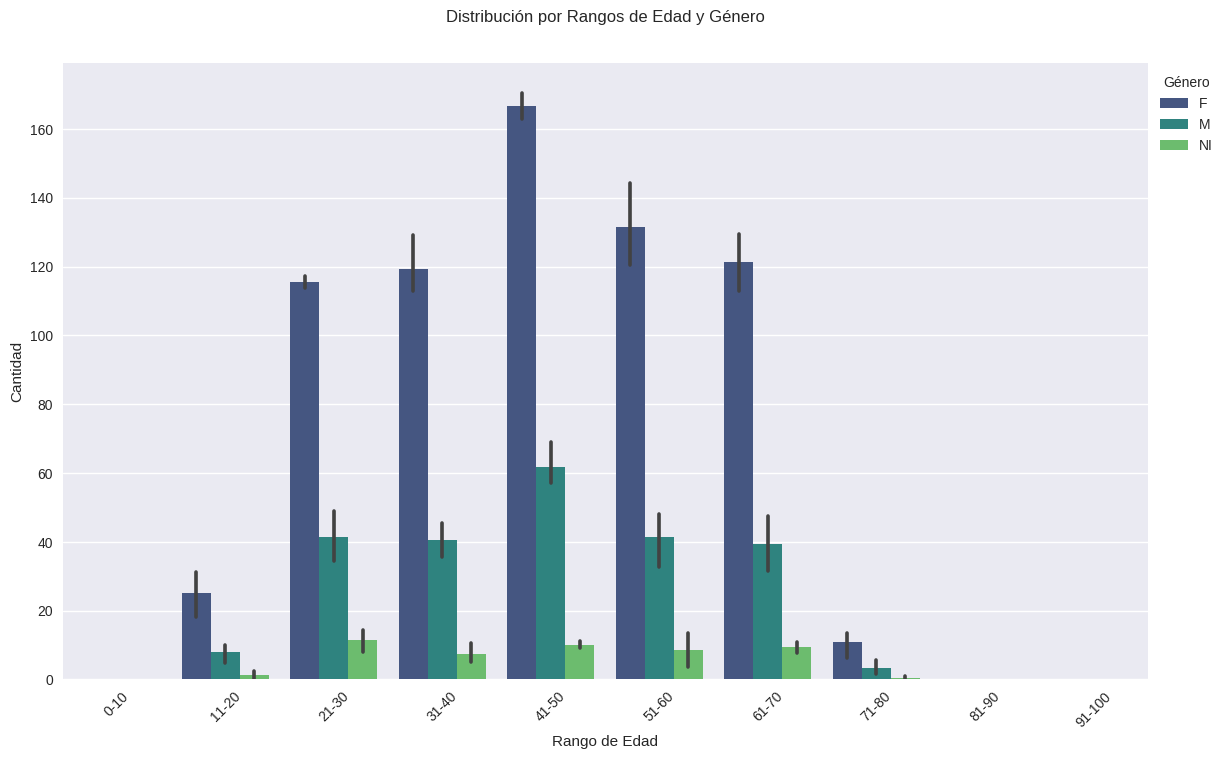

In [230]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_shopping_cl['Age Group'] = pd.cut(df_shopping_cl['Age'], bins=bins, labels=labels, right=False)

age_gender_season_counts = df_shopping_cl.groupby(['Age Group', 'Gender', 'Season']).size().reset_index(name='Count')


plt.figure(figsize=(14, 8))
sns.barplot(data=age_gender_season_counts, x='Age Group', y='Count', hue='Gender', palette='viridis')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.title('Distribución por Rangos de Edad y Género', pad=30)
plt.xticks(rotation=45)
plt.legend(title='Género', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()





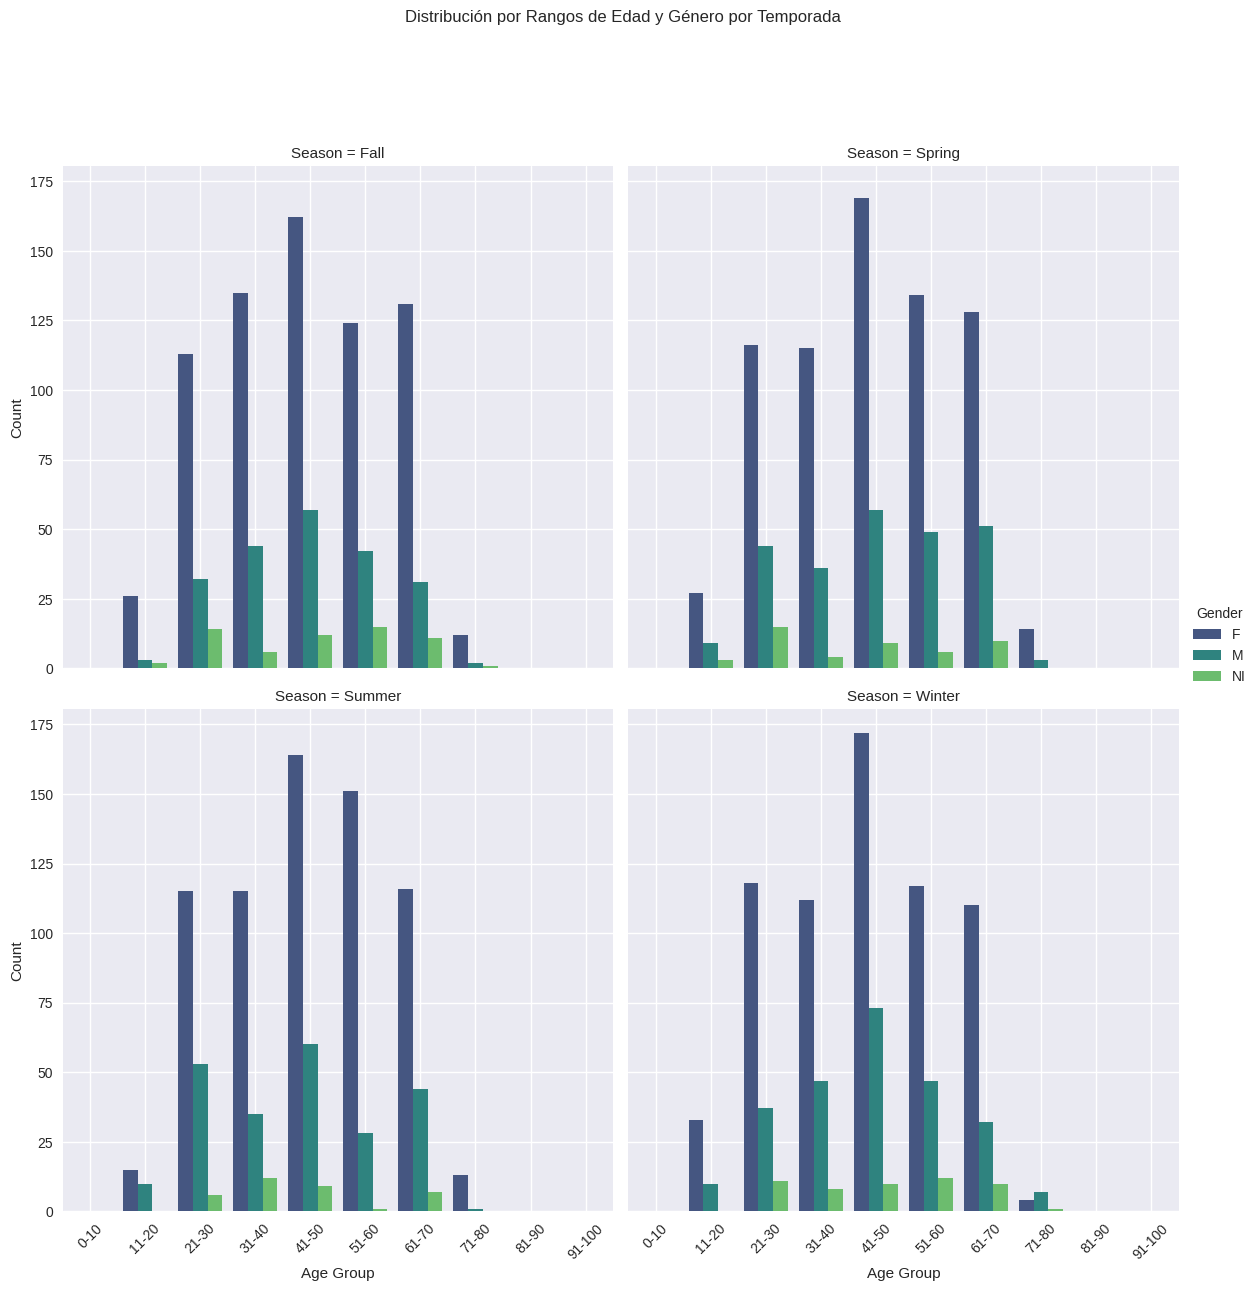

In [231]:
g = sns.catplot(
    data=age_gender_season_counts,
    x='Age Group',
    y='Count',
    hue='Gender',
    col='Season',
    kind='bar',
    palette='viridis',
    height=6,
    aspect=1,
    col_wrap=2
)


g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Distribución por Rangos de Edad y Género por Temporada', y=1.05 )

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    ax.grid(True)
plt.show()



Este Analisis nos muestra que la mayoria de los clientes sin importar el genero se encuentran en el grupo etario de 41 a 50 años, y en su mayoria genero Femenino

Se observa que el grupo de 51 a 60 años varia su cantidad dependiendo de la temporada

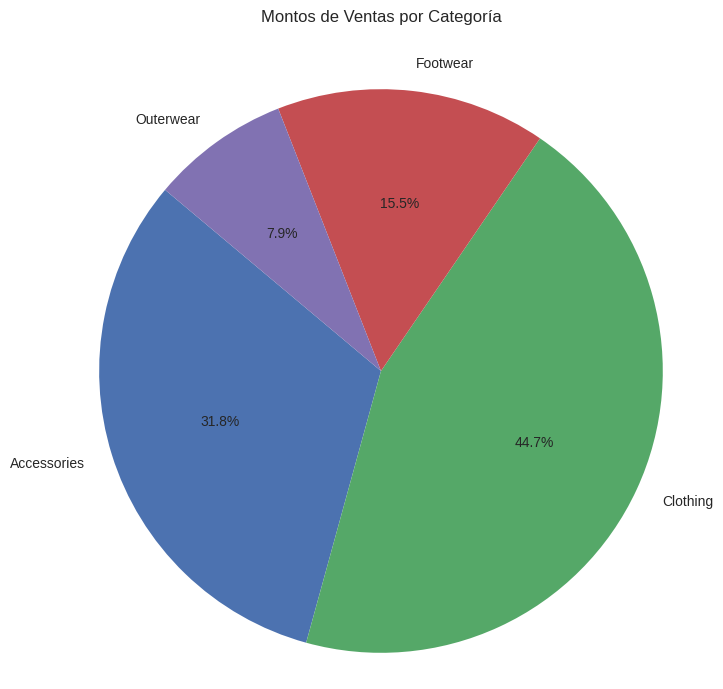

In [232]:

sales_by_category = df_shopping_cl.groupby('Category')['Purchase Amount (USD)'].sum()
plt.figure(figsize=(8, 8))

plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Montos de Ventas por Categoría',  pad=30)
plt.axis('equal')

plt.show()


Se observa que casi el 50% de las ventas (en montos)
 corresponden a la categoria Clothing, es decir ropa

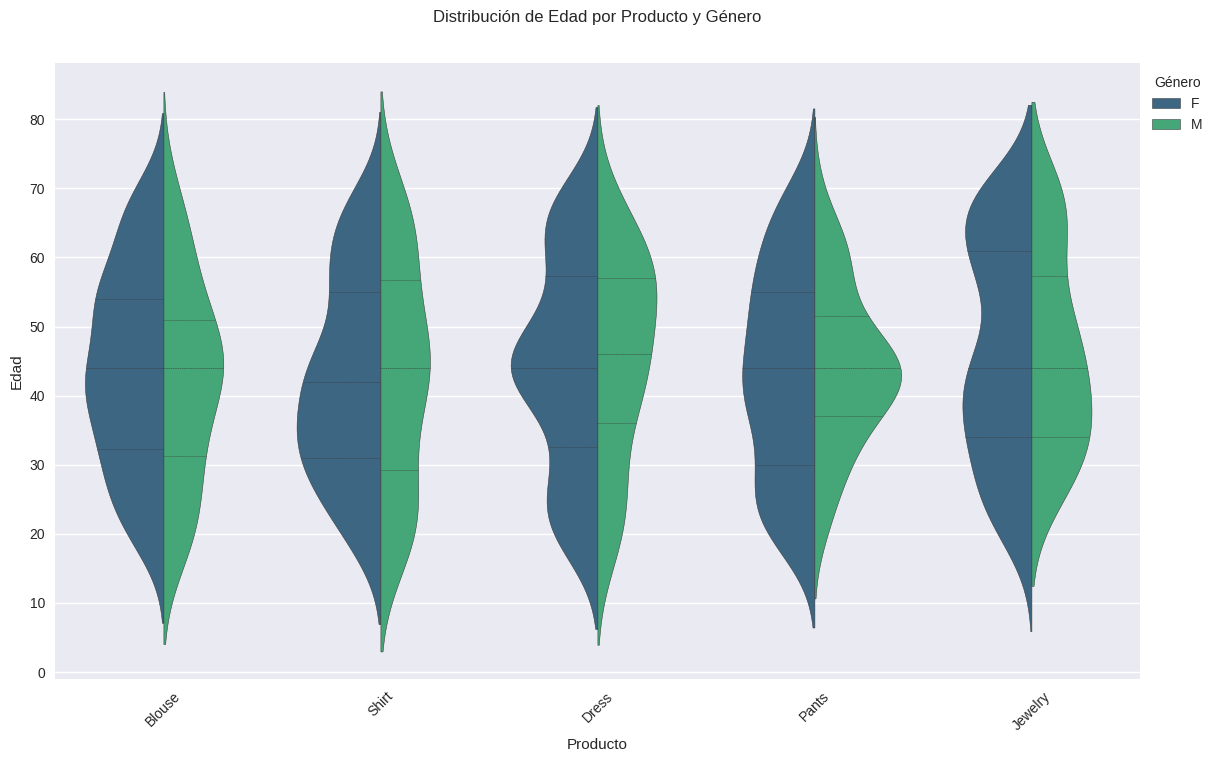

In [233]:

top_5_products = df_shopping_cl['Item Purchased'].value_counts().nlargest(5).index
filtered_df = df_shopping_cl[df_shopping_cl['Item Purchased'].isin(top_5_products)]
plt.figure(figsize=(14, 8))
sns.violinplot(data=filtered_df, x='Item Purchased', y='Age', hue='Gender', split=True, inner='quartile', palette='viridis', hue_order=['F', 'M'])
plt.xlabel('Producto')
plt.ylabel('Edad')
plt.title('Distribución de Edad por Producto y Género', pad =30)
plt.xticks(rotation=45)
plt.legend(title='Género', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()






Este analisis permite identifacar jewelry (dentro de la categoria accesorios) como uno de los articulos mas vendidos
Se observan diferencias en la distribución de edades entre hombres y mujeres para cada uno de los productos más vendidos

# ANALISIS DE DISTINTAS HIPOTESIS


# NUEVOS CLIENTES

## Sobre un total de 3900 tengo 2730 clientes que no tienen compras anteriores, es decir NUEVOS CLIENTES, podria analizar los clientes antiguos para fidelizar los nuevos

In [255]:
pp_counts = df_shopping_cl['Previous Purchases'].value_counts()

print(pp_counts)

Previous Purchases
0     2730
42      35
3       34
24      33
21      32
14      32
28      30
10      29
27      29
47      28
50      27
19      27
48      27
26      26
40      26
5       26
8       25
16      25
15      25
29      25
39      25
38      24
30      24
11      23
6       23
2       23
33      23
31      23
46      23
13      22
18      22
45      22
20      21
34      21
23      21
12      21
4       21
36      20
37      20
22      19
7       19
43      19
17      18
41      18
49      18
25      18
9       18
32      16
44      16
1       15
35      13
Name: count, dtype: int64


In [256]:
total_clients = len(df_shopping_cl)
new_clients = pp_counts[0]
percentage_new_clients = (new_clients / total_clients) * 100
print("Porcentaje de nuevos clientes:", percentage_new_clients)


Porcentaje de nuevos clientes: 70.0


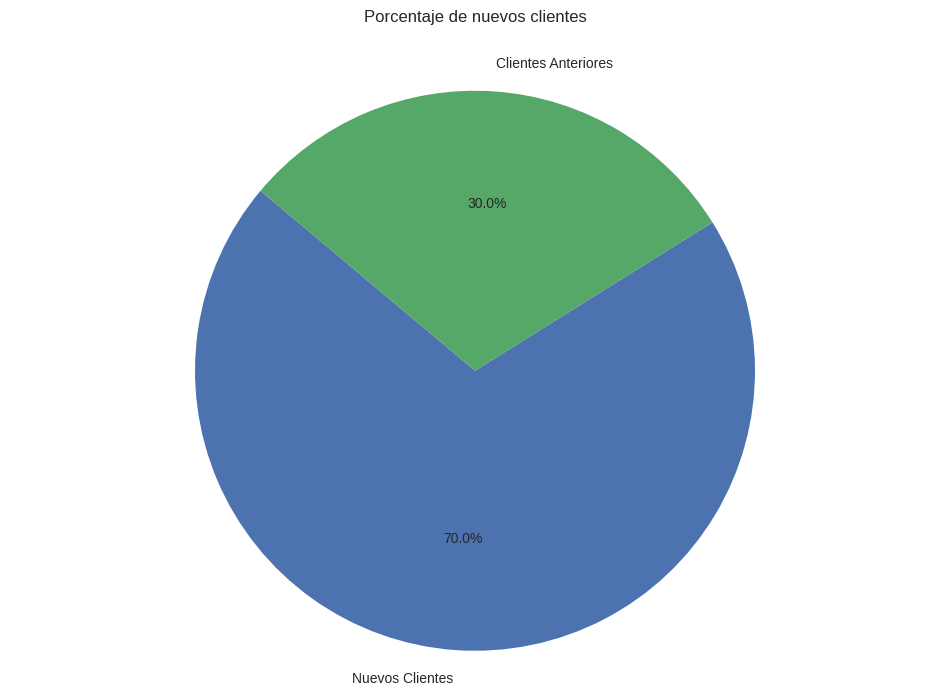

In [257]:

labels = ['Nuevos Clientes', 'Clientes Anteriores']
sizes = [new_clients, total_clients - new_clients]
plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de nuevos clientes', pad =30)
plt.axis('equal')
plt.show()


Creo un DF que contiene solamente los clientes existentes para poder evaluar las variables y buscar relaciones

In [258]:
df_shopping_cl['Previous Purchases'] = pd.to_numeric(df_shopping_cl['Previous Purchases'], errors='coerce')
existist_clients_df = df_shopping_cl[df_shopping_cl['Previous Purchases'] > 0]
existist_clients_df.head()


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Discount value,Age Group
Customer ID,,,,,,,,,,,,,,,,,
9,26,F,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,8,Debit Card,20.0,21-30
10,57,M,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,4,Cash,10.0,51-60
13,61,F,Coat,Outerwear,72,Delaware,M,Gold,Winter,4.5,Yes,Express,No,37,Debit Card,0.0,61-70
14,44,M,Dress,Clothing,51,New Hampshire,M,Violet,Spring,4.7,Yes,Express,No,31,Credit Card,0.0,41-50
15,64,F,Coat,Outerwear,53,New York,L,Teal,Winter,4.7,Yes,Free Shipping,No,34,Debit Card,0.0,61-70


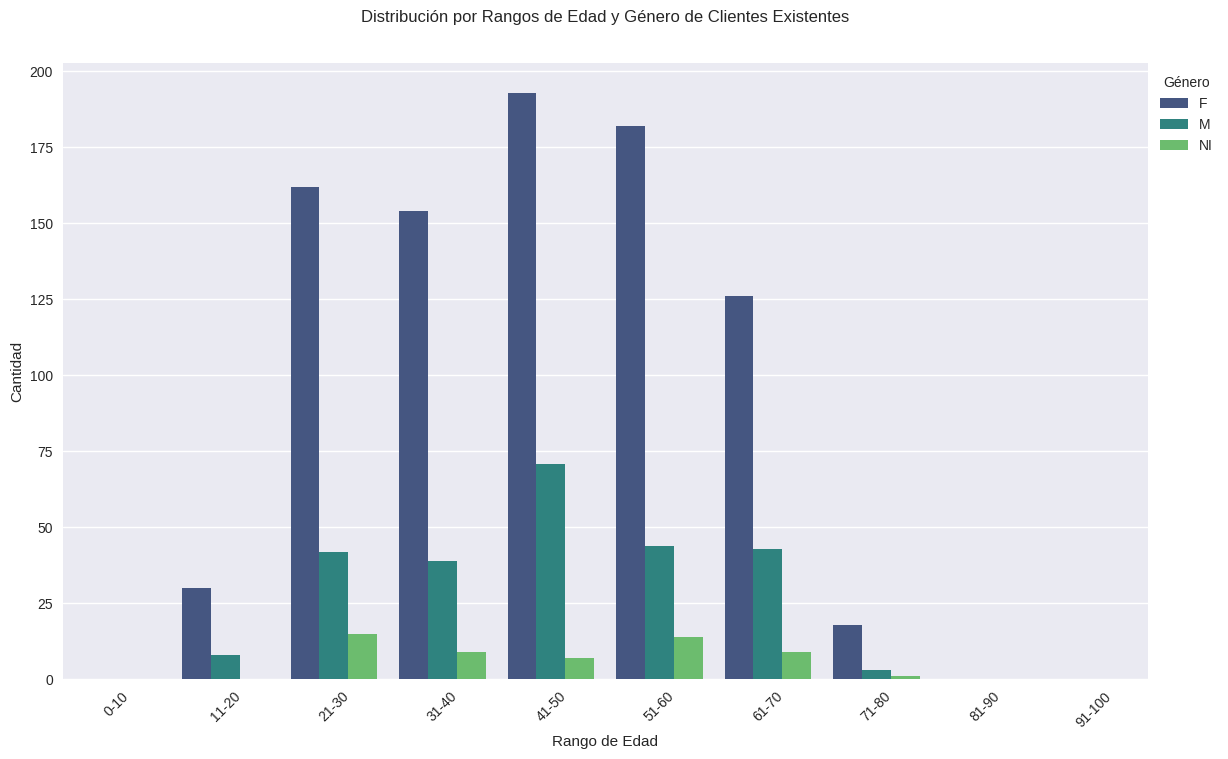

In [259]:

age_gender_counts = existist_clients_df.groupby(['Age Group', 'Gender']).size().reset_index(name='Count')


plt.figure(figsize=(14, 8))
sns.barplot(data=age_gender_counts, x='Age Group', y='Count', hue='Gender', palette='viridis')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.title('Distribución por Rangos de Edad y Género de Clientes Existentes', pad =30)
plt.xticks(rotation=45)
plt.legend(title='Género', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



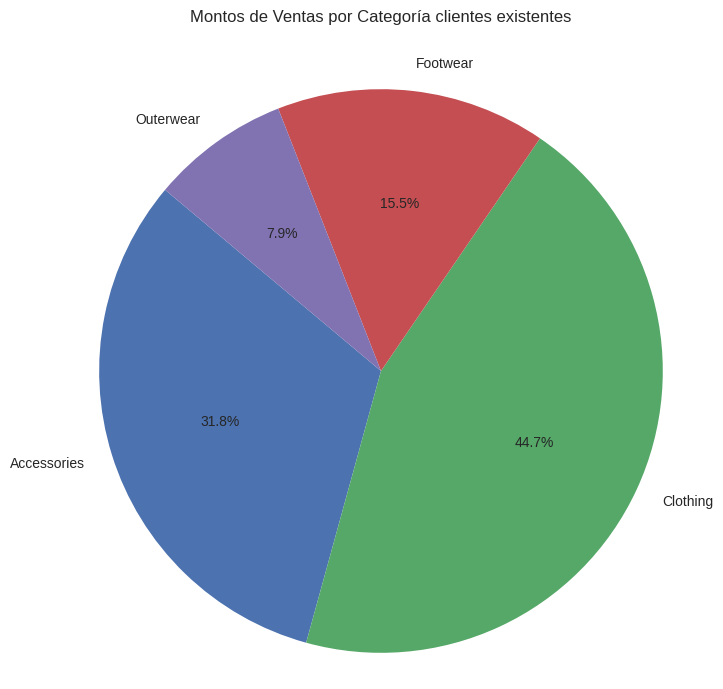

In [260]:
sales_by_category_existing_clients =existist_clients_df.groupby('Category')['Purchase Amount (USD)'].sum()
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Montos de Ventas por Categoría clientes existentes', pad=30)
plt.axis('equal')
plt.show()


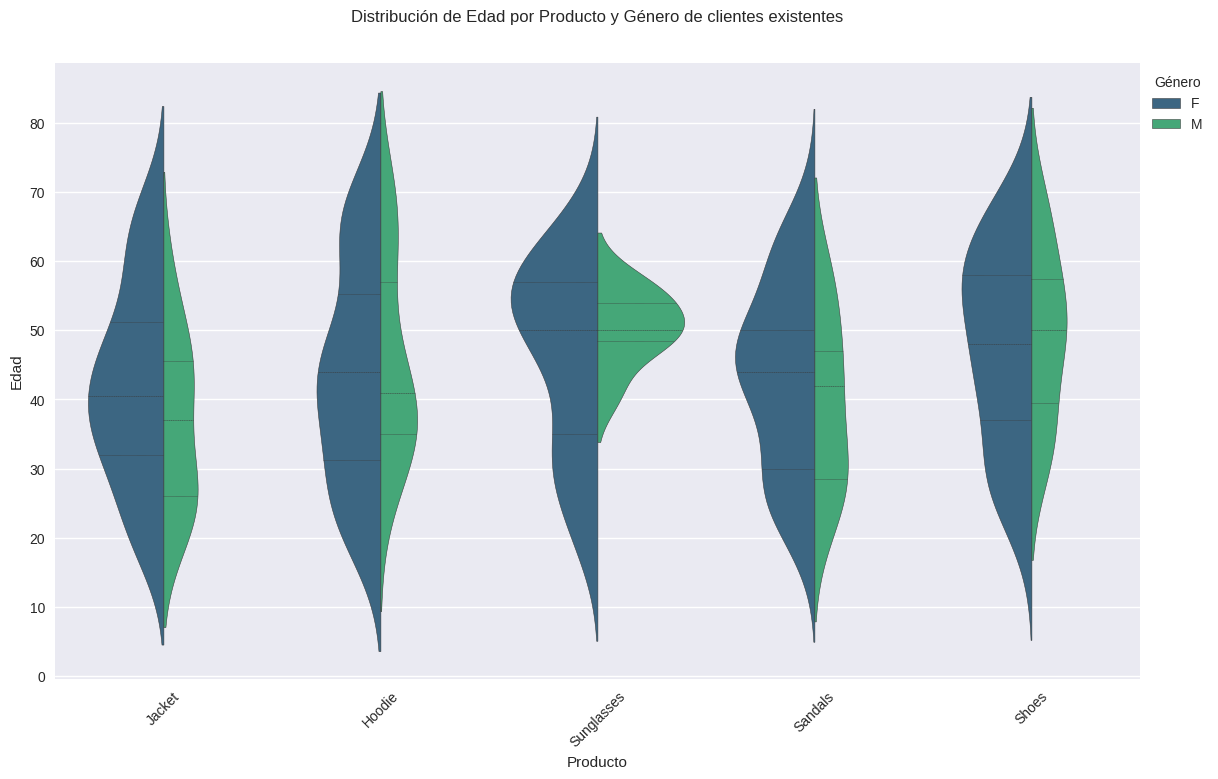

In [261]:


top_5_products = existist_clients_df['Item Purchased'].value_counts().nlargest(5).index
filtered_df = existist_clients_df[existist_clients_df['Item Purchased'].isin(top_5_products)]
plt.figure(figsize=(14, 8))
sns.violinplot(data=filtered_df, x='Item Purchased', y='Age', hue='Gender', split=True, inner='quartile', palette='viridis', hue_order=['F', 'M'])
plt.xlabel('Producto')
plt.ylabel('Edad')
plt.title('Distribución de Edad por Producto y Género de clientes existentes', pad =30)
plt.xticks(rotation=45)
plt.legend(title='Género', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


Se puede observar que se mantinene tanto la distribucion de las edades y genero como el porcentaje de categorias de articulos vendidos (en monto) , pero varian los productos mas vendidos siendo tres de ellos de una categoria diferente a ropa
se observa una distribucion de edades muy distinta en el caso de los anteojos de sol para el genero masculico concentrada en cliente de 35 a 65 años

Podria crearse un campaña de marketing donde se le ofrezcan clientes masculinos de entre 35 y 65 años que hayan realizado una compra modelos de anteojos de sol

# Hipótesis: La temporada del año afecta el monto de la compra. ¿Cual seria la temporada alta de Ventas?

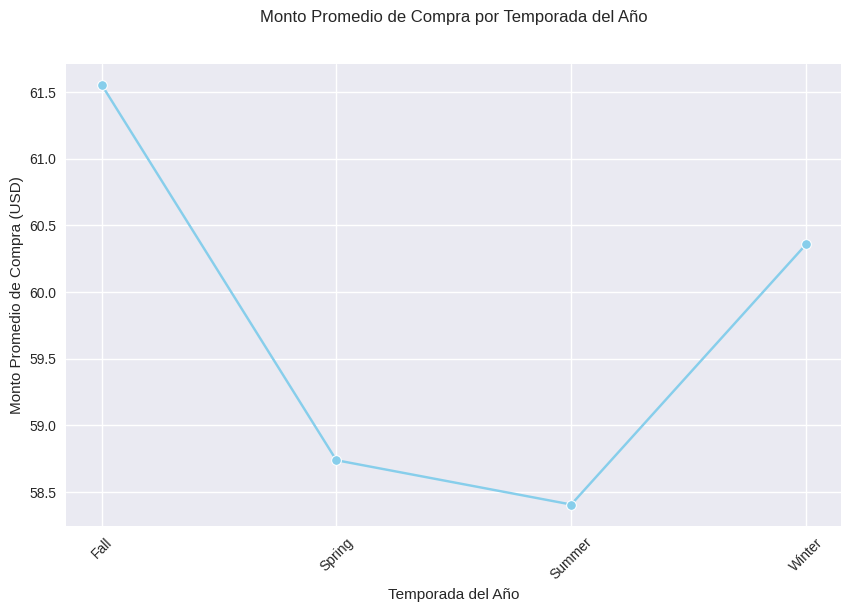

In [241]:
average_purchase_by_season = df_shopping_cl.groupby('Season')['Purchase Amount (USD)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_purchase_by_season, x='Season', y='Purchase Amount (USD)', marker='o', color='skyblue')
plt.title('Monto Promedio de Compra por Temporada del Año', pad =30)
plt.xlabel('Temporada del Año')
plt.ylabel('Monto Promedio de Compra (USD)')
plt.xticks(rotation=45)
#plt.grid(True)
plt.show()


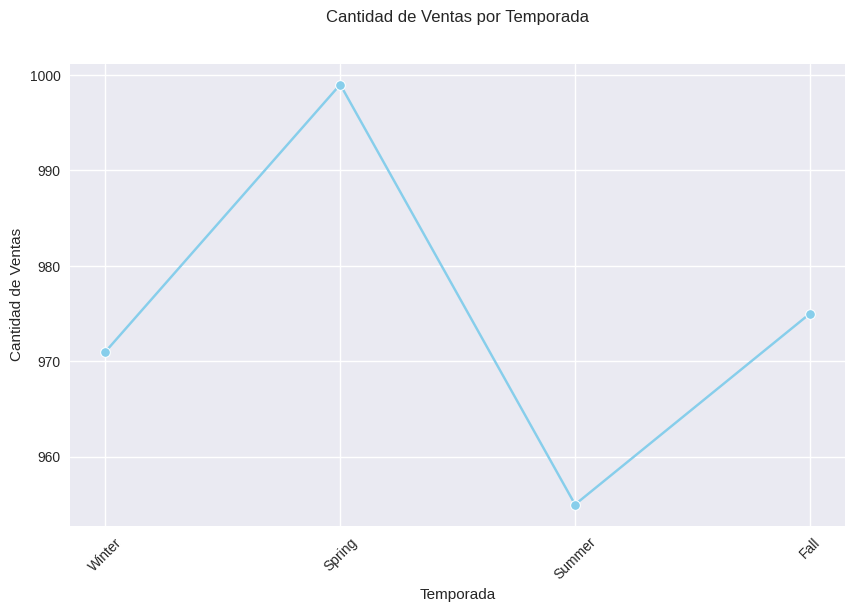

In [242]:
sales_count_by_season = df_shopping_cl['Season'].value_counts().reset_index()
sales_count_by_season.columns = ['Season', 'Number of Sales']
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
sales_count_by_season['Season'] = pd.Categorical(sales_count_by_season['Season'], categories=season_order, ordered=True)
sales_count_by_season = sales_count_by_season.sort_values('Season')
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_count_by_season, x='Season', y='Number of Sales', marker='o', color='skyblue')
plt.title('Cantidad de Ventas por Temporada', pad =30)
plt.xlabel('Temporada')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
#plt.grid(True)
plt.show()


EL OBJETIVO ES SEGUIR INCREMENTANDO LOS CLIENTES

Existe una dicotomía entre ambos análisis: por un lado, el monto de ventas es mayor en la temporada de otoño, mientras que la cantidad de ventas es mayor en primavera. Dado que el objetivo es incrementar la cantidad de clientes, me centraré en la temporada con mayor cantidad de ventas, es decir, primavera. Es posible que los artículos de otoño sean más costosos, lo que explicaría el mayor monto de ventas en esa temporada.



ANALIZO LA TEMPORADA SPRING

Filtro por clientes mujeres entre 41 y 60 años

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


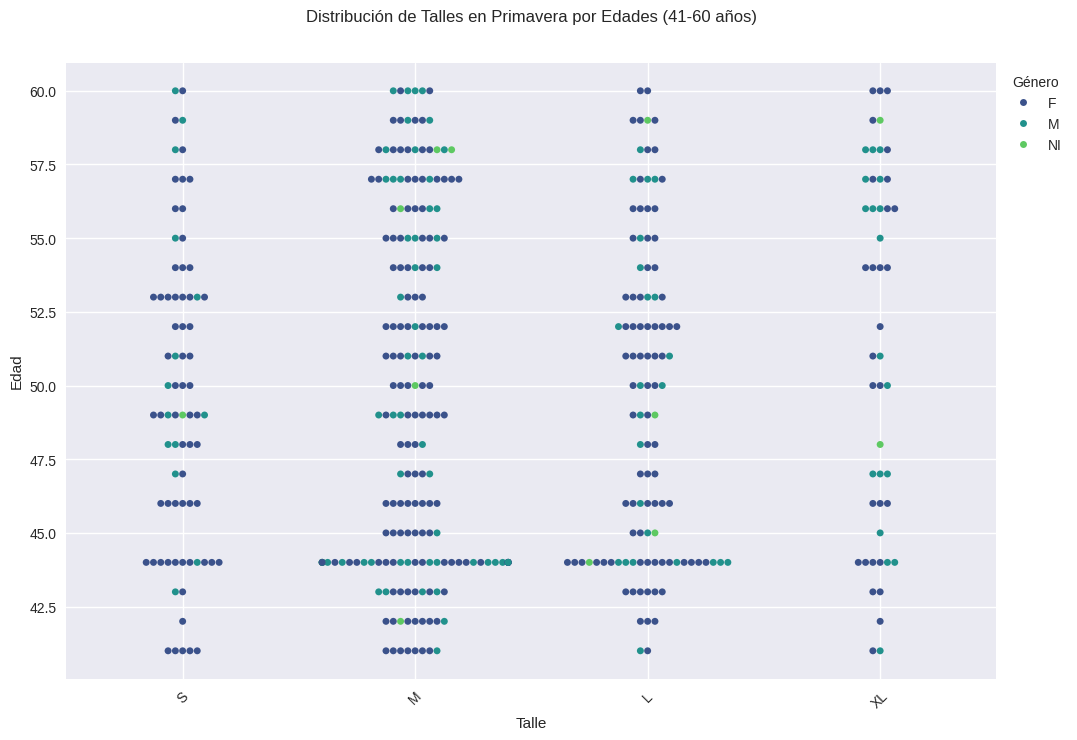

In [243]:
spring_df = df_shopping_cl[df_shopping_cl['Season'] == 'Spring']

spring_df_filtered = spring_df[(spring_df['Age'] >= 41) & (spring_df['Age'] <= 60)]

plt.figure(figsize=(12, 8))
sns.swarmplot(data=spring_df_filtered, x='Size', y='Age', hue='Gender', palette='viridis')
plt.title('Distribución de Talles en Primavera por Edades (41-60 años)', pad= 30)
plt.xlabel('Talle')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.legend(title='Género', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Se observa que hay mayor cantidad de ventas de los talles m y l y las clientas tienen alrededor de 44 años, pocas ventas del talle xl

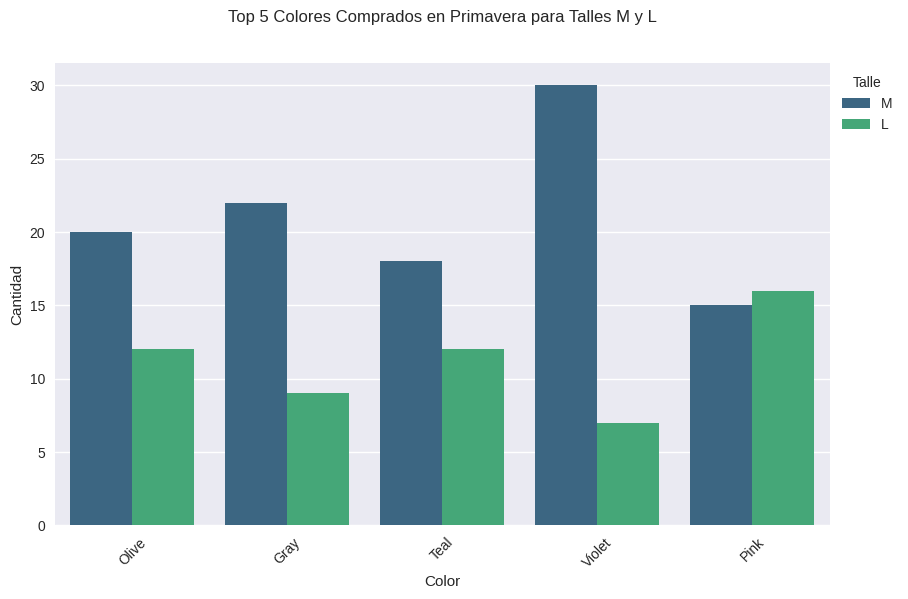

In [244]:
top5_colors = spring_df['Color'].value_counts().nlargest(5).index

spring_top5_colors = spring_df[spring_df['Color'].isin(top5_colors)]

spring_top5_colors_M_L = spring_top5_colors[spring_top5_colors['Size'].isin(['M', 'L'])]

plt.figure(figsize=(10, 6))
sns.countplot(data=spring_top5_colors_M_L, x='Color', hue='Size', palette='viridis', order=top5_colors)
plt.title('Top 5 Colores Comprados en Primavera para Talles M y L', pad = 30)
plt.xlabel('Color')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Talle',  loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Se evalua los colores mas vendidos en primavera para los talles m y l , predominando el violeta para el talle M yel rosa para el talle L

Este Analisis podria servirnos para ofrecer productos especificos, por ejemplo para el publico analizada de 41 a 60 años que utiliza talle M su prefencia fue el color violeta para la temporada de Primavera

# Analisis de las 5 ciudades con mas ventas

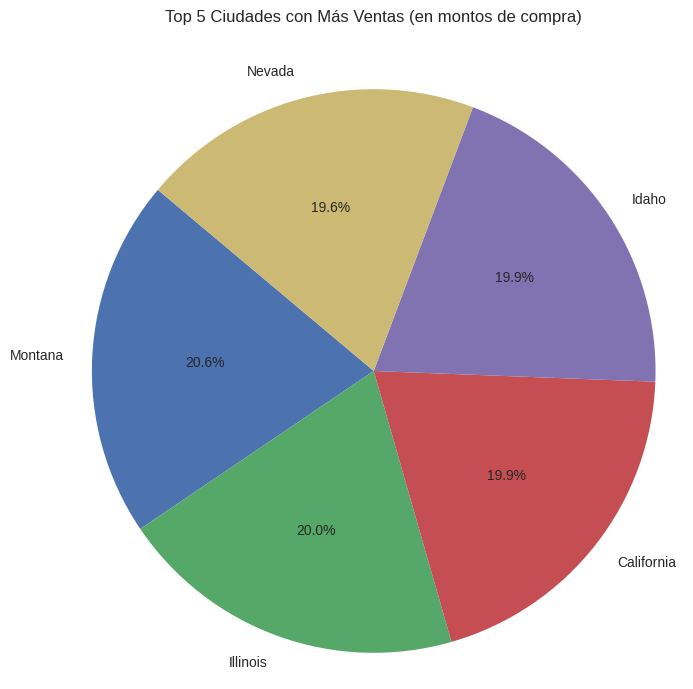

In [245]:

sales_by_city = df_shopping_cl.groupby('Location')['Purchase Amount (USD)'].sum()
top5_cities = sales_by_city.nlargest(5)

plt.figure(figsize=(8, 8))
plt.pie(top5_cities, labels=top5_cities.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Ciudades con Más Ventas (en montos de compra)', pad =30)
plt.axis('equal')
plt.show()


<ipython-input-246-2a70d20b2273>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top5_cities, x='Location', y='Purchase Amount (USD)', hue='Payment Method', estimator=sum, ci=None, palette='viridis')


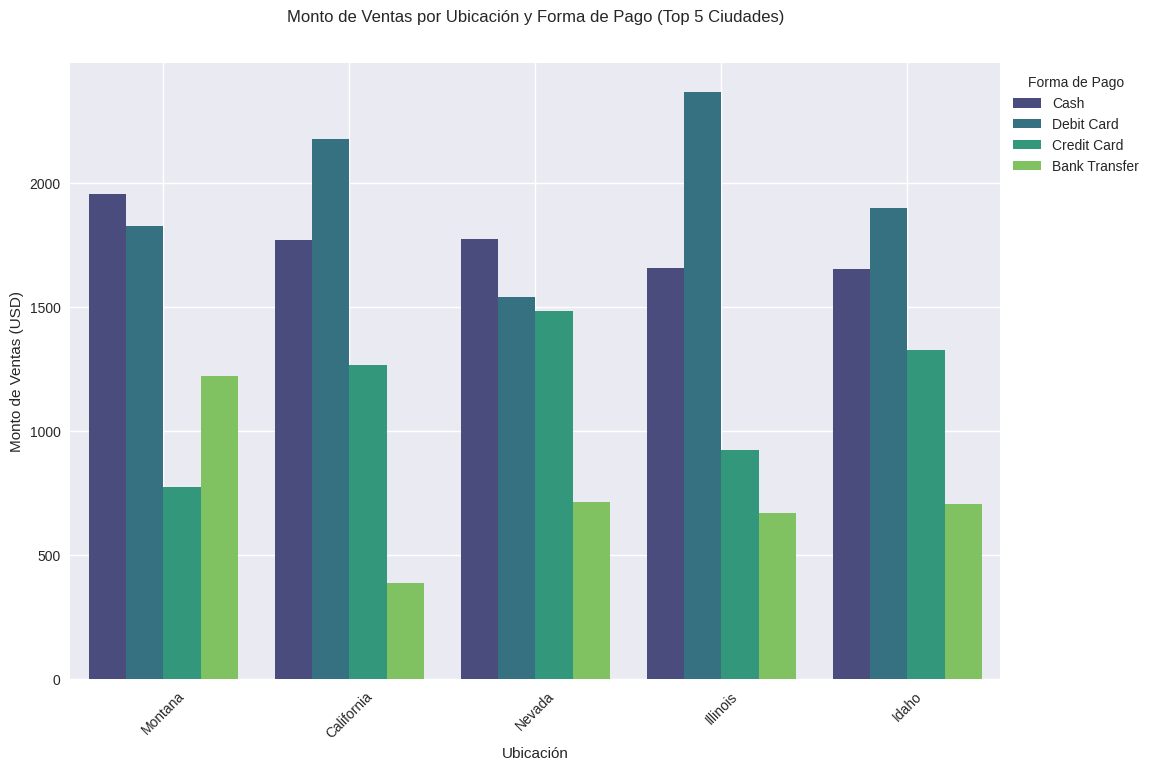

In [246]:

top5_cities = sales_by_city.nlargest(5).index


df_top5_cities = df_shopping_cl[df_shopping_cl['Location'].isin(top5_cities)]


plt.figure(figsize=(12, 8))
sns.barplot(data=df_top5_cities, x='Location', y='Purchase Amount (USD)', hue='Payment Method', estimator=sum, ci=None, palette='viridis')
plt.title('Monto de Ventas por Ubicación y Forma de Pago (Top 5 Ciudades)', pad =30)
plt.xlabel('Ubicación')
plt.ylabel('Monto de Ventas (USD)')
plt.xticks(rotation=45)
plt.legend(title='Forma de Pago', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



<ipython-input-247-f20a90582733>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top5_cities, y='Location', x='Purchase Amount (USD)', hue='Shipping Type', estimator=sum, ci=None, palette='viridis', order=top5_cities)


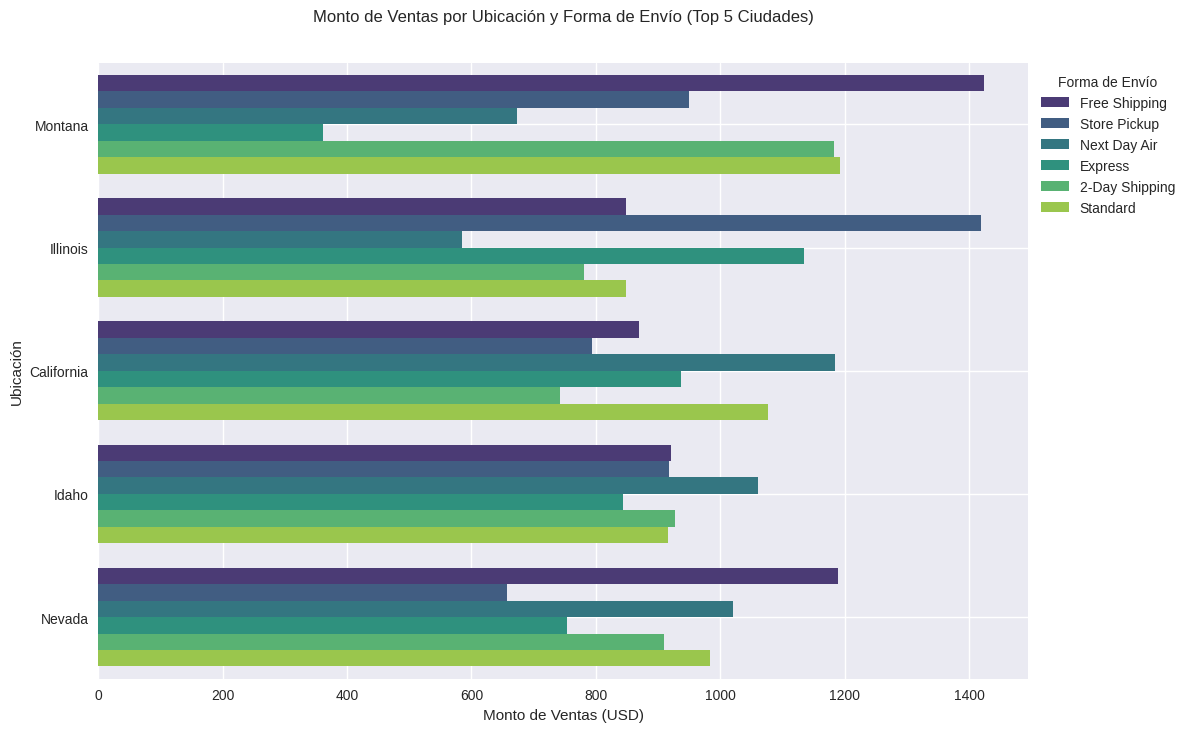

In [247]:


plt.figure(figsize=(12, 8))
sns.barplot(data=df_top5_cities, y='Location', x='Purchase Amount (USD)', hue='Shipping Type', estimator=sum, ci=None, palette='viridis', order=top5_cities)
plt.title('Monto de Ventas por Ubicación y Forma de Envío (Top 5 Ciudades)', pad=30)
plt.xlabel('Monto de Ventas (USD)')
plt.ylabel('Ubicación')
plt.legend(title='Forma de Envío', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



Podemos observar las 5 ciudades con mas ventas : Montana, Illinois, California, Idaho y Nevada
Del analisis de forma de pago se desprende que en 3 de las 5 ciudades el metodo de pago preferido fue tarjeta de debito y en el caso de analisis de envio prevalece el Free Shipping en la ciudades de Montana y Nevada, el Store Pick uo para Illinois y Next Day Air para California e Idaho

Estas cuoestiones podrian llegar a ser relevantes al momento de elegir servicios de entrega o correos y a su vez para ofrecer promociones a traves de bancos

# CONCLUSION DEL ANALISIS INICIAL


Tras completar el análisis descriptivo del conjunto de datos, considero haber  obtenido información valiosa que me permite comprender mejor el comportamiento de los clientes y las tendencias de ventas.

Primero, al analizar la distribución de clientes existentes por género y los productos más demandados, se pudo identificar patrones significativos en las preferencias de compra. Esta comprensión  proporciona una base sólida para futuras estrategias de marketing y gestión de inventario.

Luego, al enfocarme en la temporada con mayores ventas del año, nos centramos en un segmento específico de clientes: mujeres de 41 a 60 años, quienes destacaron como el grupo demográfico más activo en términos de compras. Este análisis permitió explorar sus preferencias en cuanto a colores y tallas, lo que brinda información clave para personalizar la oferta de productos.

Finalmente, al examinar las cinco ciudades con mayores ventas en términos de montos, pude identificar las formas de pago y envío preferidas por los clientes más activos. Este conocimiento permitira adaptar las estrategias logísticas y de pago para satisfacer las necesidades específicas de cada mercado, asimismo sirve para establecer estrategias con distintos bancos para ofrecer promociones

En conjunto, este análisis exploratorio ha proporcionado información valiosa que servirá de base para futuras etapas del proyecto. Con estos insights, considero que podre seleccionar modelos y estrategias que me ayuden a alcanzar el objetivo de negocio: incrementar la cantidad de clientes, aumentar las ventas y fidelizar a los nuevos compradores.

# Aplicacion de modelos de ML

como se comento previemente, se aplicaran logaritmos de  Machine learning cuyo objetivo sera obtener modelos que permitan  


1.   Predecir los montos de compra
2.   Predecir si el cliente si suscribiria o no al newsletter
3.   Segmentar a los clientes para campañas de marketing personalizadas.
4.   Predecir las formas de Pago para poder mejorarlas ofreciendo promociones.
5.   Predecir las calificaciones de las reseñas (Rating Review)

Se utilizarán cuatro modelos de aprendizaje supervisado y uno de aprendizaje no supervisado sobre el conjunto de datos. Se calcularán métricas pertinentes y se extraerán conclusiones sobre el rendimiento de cada modelo.

El proceso comenzará con el Label Encoder aplicado al DataFrame para preparar los datos y asegurar que sean compatibles con los algoritmos de ML seleccionados.

In [262]:
#Realizar el Label encoder del DF, se crea una copia del DF original para trabajar

df_encoded = df_shopping_cl.copy()
# columnas a codificar
columns_to_encode = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Promo Code Used', 'Payment Method', 'Age Group']

label_encoder = LabelEncoder()
for column in columns_to_encode:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
print(df_encoded.head())


             Age  Gender  Item Purchased  Category  Purchase Amount (USD)  \
Customer ID                                                                 
1             55       0               2         1                     53   
2             19       1              23         1                     64   
3             50       0              11         1                     73   
4             44       1              14         2                     90   
5             45       0               2         1                     49   

             Location  Size  Color  Season  Review Rating  \
Customer ID                                                 
1                  16     0      7       3            3.1   
2                  18     0     12       3            3.1   
3                  20     2     12       1            3.1   
4                  38     1     12       1            3.5   
5                  36     1     21       1            2.7   

             Subscription Status

# 1) Prediccion de monto de compra

In [264]:

X = df_encoded.drop(columns=['Purchase Amount (USD)'])
y = df_encoded['Purchase Amount (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [265]:
# Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [266]:
# Predicciones del test
y_pred = model.predict(X_test)

In [269]:

# Predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# Evaluación del conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = model.score(X_train, y_train)

print(f'MAE (Train): {mae_train}, MSE (Train): {mse_train}, R2 (Train): {r2_train}')

# Evaluación del conjunto de prueba
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = model.score(X_test, y_test)

print(f'MAE (Test): {mae_test}, MSE (Test): {mse_test}, R2 (Test): {r2_test}')

MAE (Train): 20.489122545401173, MSE (Train): 557.6653871907719, R2 (Train): 0.004977774254938394
MAE (Test): 20.781280170839693, MSE (Test): 566.4921383979442, R2 (Test): -0.012348077693922432


## **Interpretación de las metricas obtenidas**


*   MAE: Indica que, en promedio, las predicciones están desviadas en
aproximadamente 20.40 (entrenamiento) y 20.73 (prueba) unidades de las respuestas reales.

*  MSE: Es el promedio de los cuadrados de los errores y, por lo tanto, es más sensible a errores grandes. Aquí, el MSE es mayor que el MAE, lo cual es típico ya que el MSE penaliza más los errores grandes.
*   R²: En el conjunto de entrenamiento, el bajo valor de R² sugiere que el modelo no se ajusta bien a los datos de entrenamiento. En el conjunto de prueba, un R² negativo indica un rendimiento pobre del modelo, posiblemente debido a un ajuste deficiente o a que el modelo no es adecuado para los datos.

En resumen, estos resultados sugieren que el modelo actual no está capturando adecuadamente la relación entre las características de entrada y la variable de respuesta. Podría ser necesario revisar el modelo, considerar diferentes características, o explorar otros algoritmos de modelado para mejorar las predicciones.

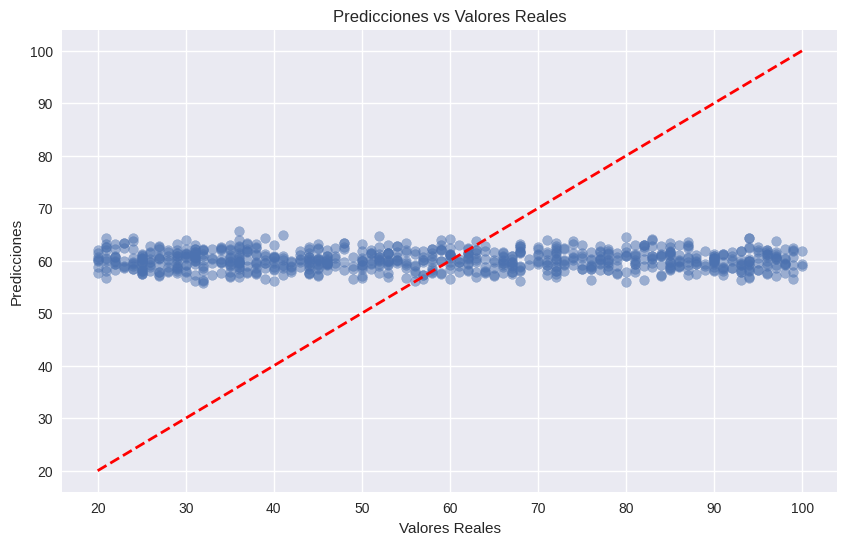

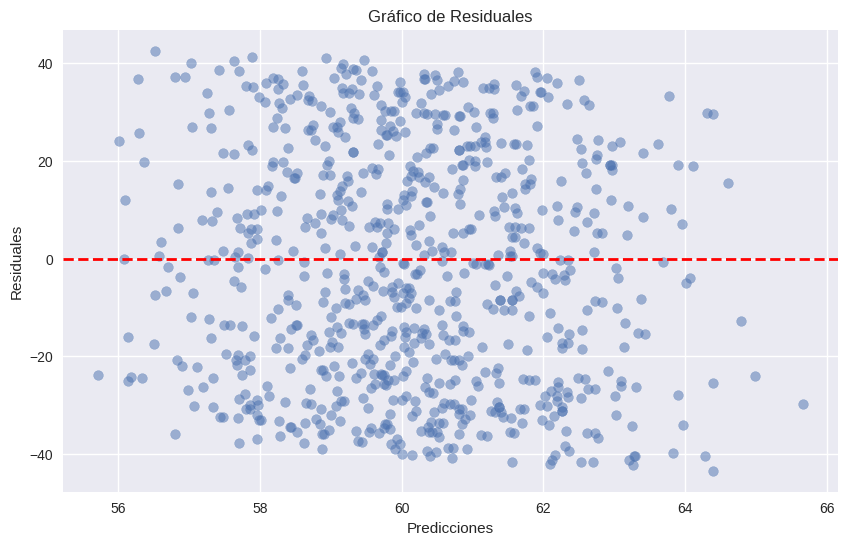

In [270]:


# Gráfico de dispersión de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.grid(True)
plt.show()

# Gráfico de residuales
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales')
plt.grid(True)
plt.show()


Ambos graficos muestran que el modelo no esta prediciendo correctamente

# 2) Prediccion de suscripcion

In [271]:
pip install pandas scikit-learn matplotlib graphviz


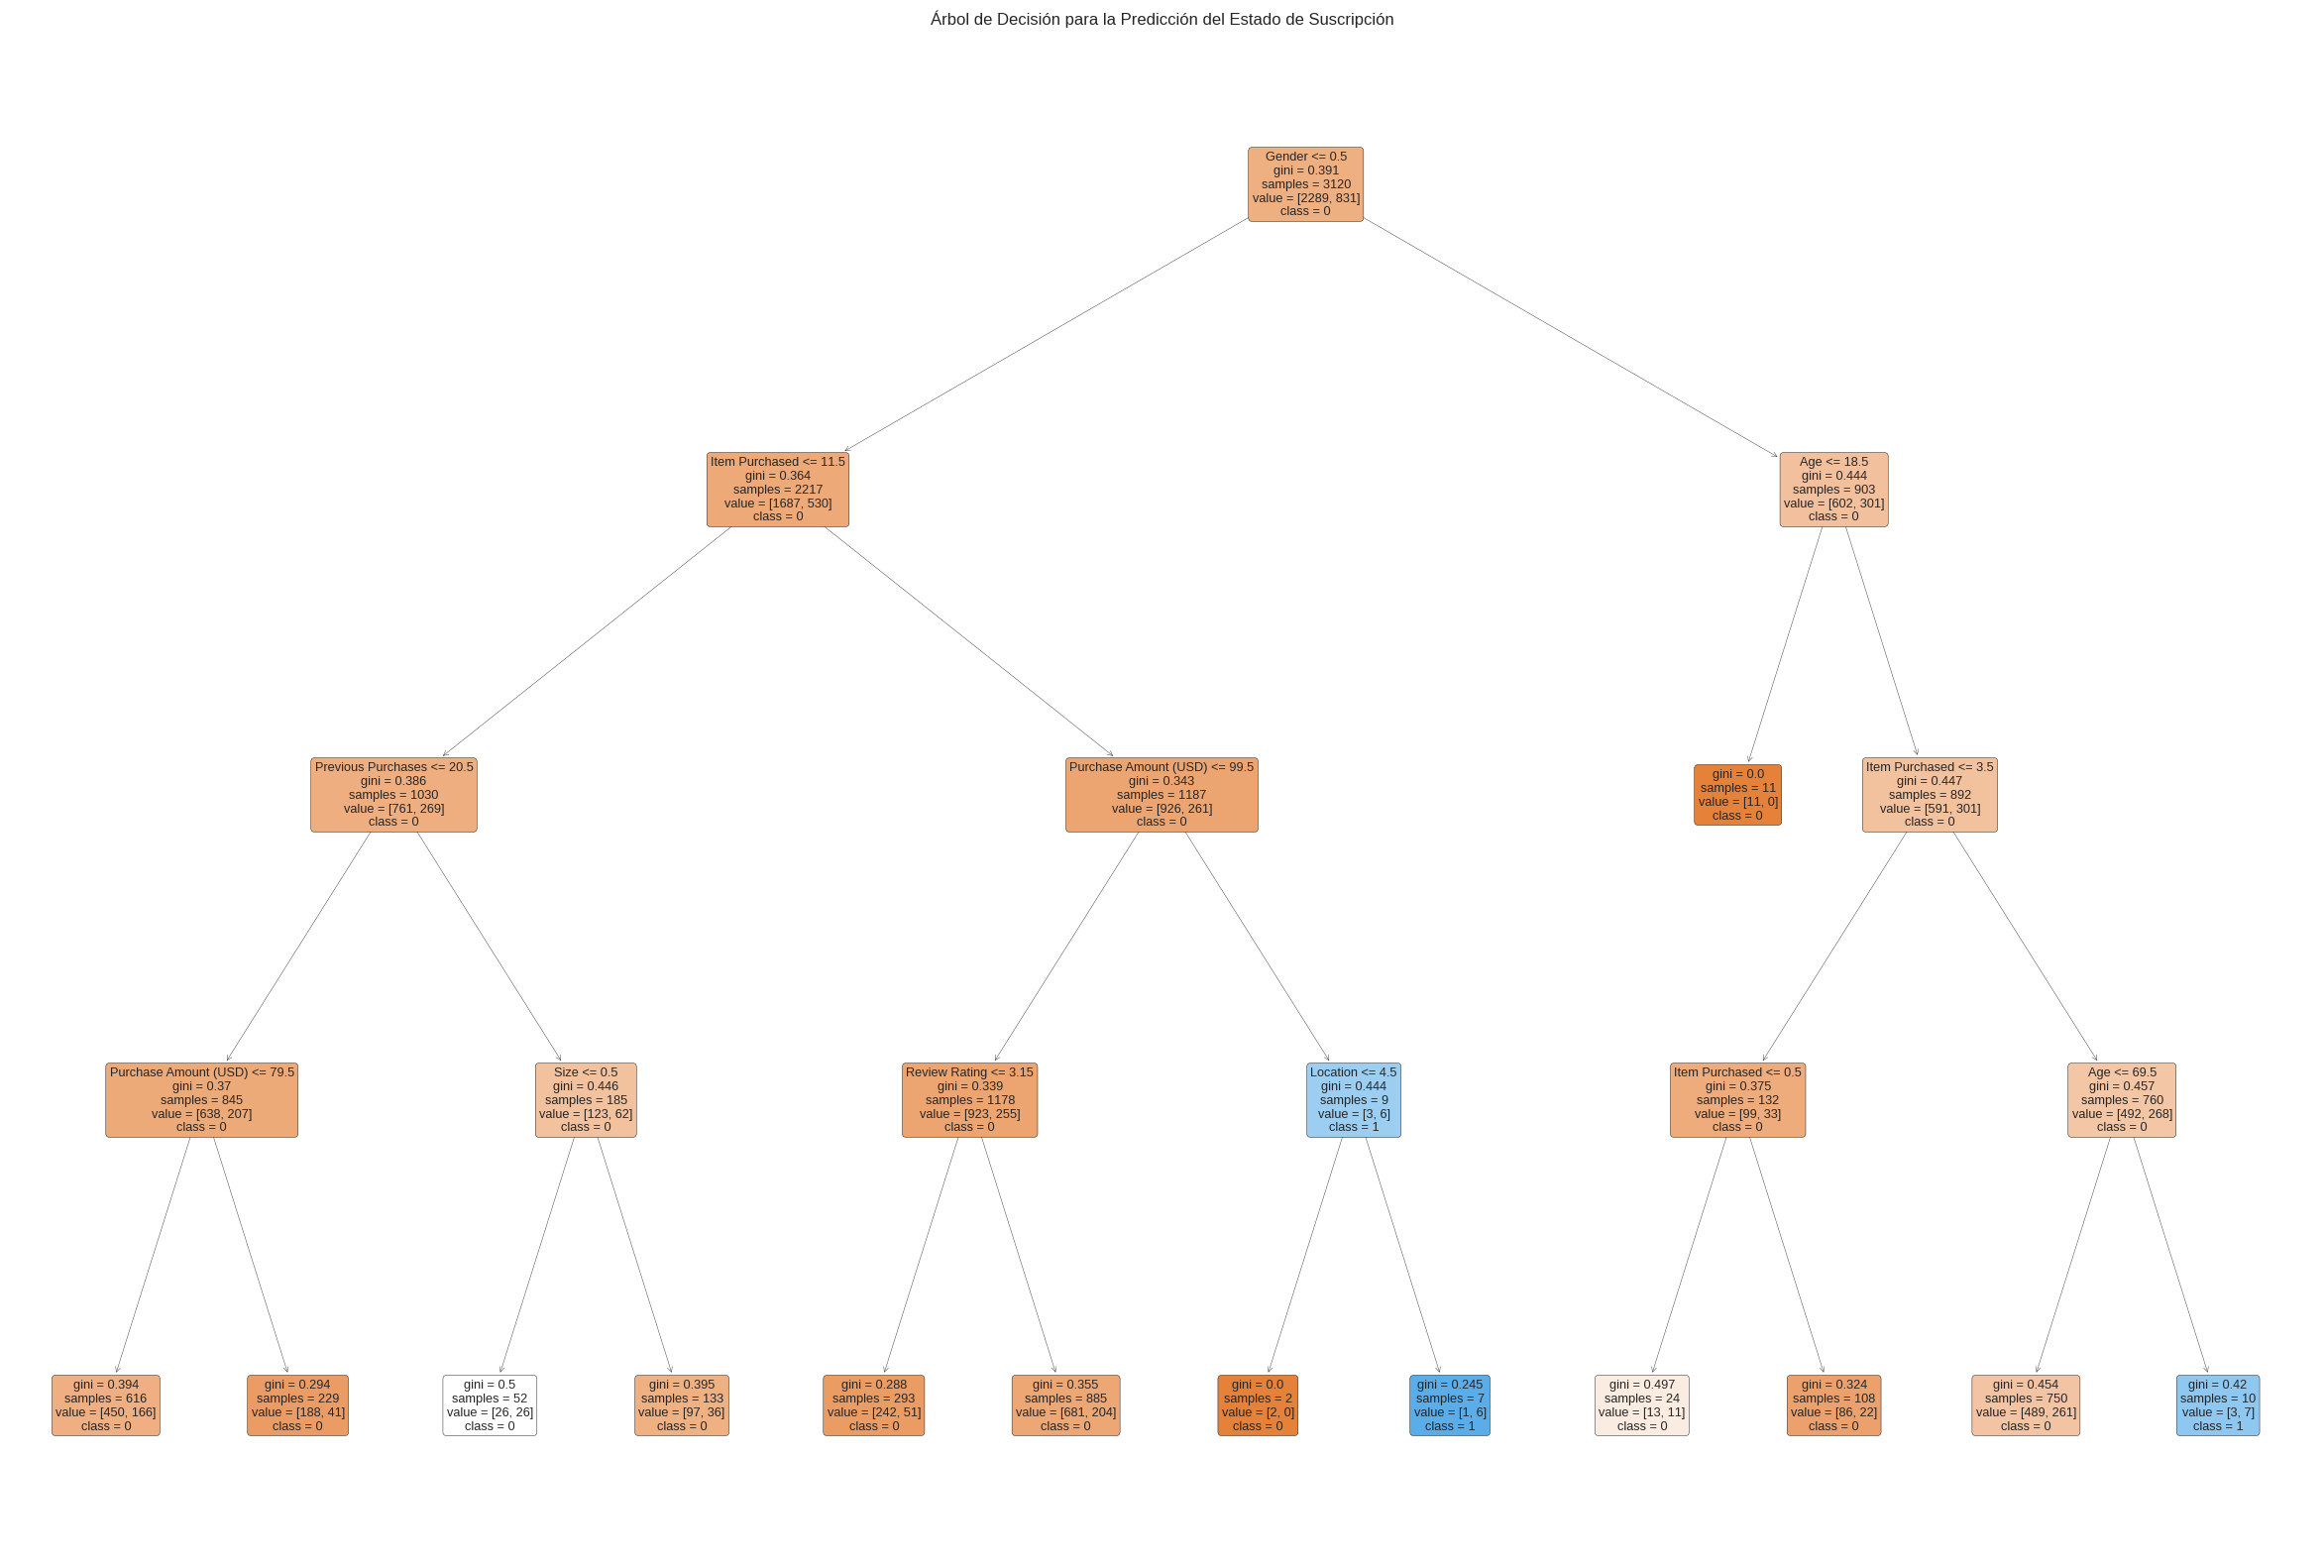

In [272]:

X = df_encoded.drop(columns=['Subscription Status'])
y = df_encoded['Subscription Status']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Visualizar el árbol de decisión
plt.figure(figsize=(30,20))
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_.astype(str), rounded=True)
plt.title('Árbol de Decisión para la Predicción del Estado de Suscripción')
plt.show()


In [273]:
# Calculo del Accuracy del test y del train

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy en el conjunto de prueba: {accuracy_test}')
print(f'Accuracy en el conjunto de entrenamiento: {accuracy_train}')


Accuracy en el conjunto de prueba: 0.7141025641025641
Accuracy en el conjunto de entrenamiento: 0.7365384615384616


In [274]:
#Calculo de precision del test y del train

from sklearn.metrics import precision_score
from sklearn import metrics

precision_test = precision_score(y_test, y_test_pred)
precision_train = precision_score(y_train, y_train_pred)
print(f'Precision del conjunto de prueba: {precision_test}')
print(f'Precision del conjunto de entrenamient: {precision_train}')

Precision del conjunto de prueba: 0.0
Precision del conjunto de entrenamient: 0.7647058823529411


In [275]:
#Calculo de sensibulidada del test y del train
from sklearn.metrics import recall_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

print(f'Sensibilidad (Recall) en el conjunto de prueba: {recall_test}')
print(f'Sensibilidad (Recall) en el conjunto de entrenamiento: {recall_train}')


Sensibilidad (Recall) en el conjunto de prueba: 0.0
Sensibilidad (Recall) en el conjunto de entrenamiento: 0.015643802647412757


In [276]:
from sklearn.metrics import f1_score

#F1 Score del test y del train
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f'F1-score en el conjunto de prueba: {f1_test}')
print(f'F1-score en el conjunto de entrenamiento: {f1_train}')



F1-score en el conjunto de prueba: 0.0
F1-score en el conjunto de entrenamiento: 0.03066037735849057


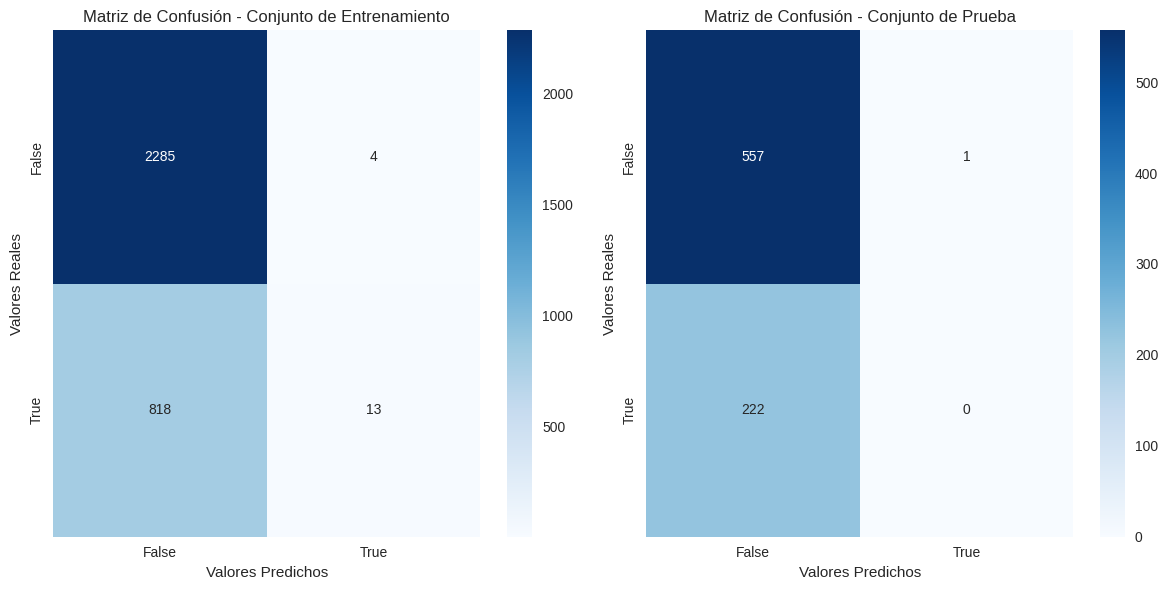

Matriz de Confusión - Conjunto de Entrenamiento:
[[2285    4]
 [ 818   13]]

Matriz de Confusión - Conjunto de Prueba:
[[557   1]
 [222   0]]


In [277]:
from sklearn.metrics import confusion_matrix


# Predicciones en el conjunto de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular matrices de confusión
cf_matrix_train = confusion_matrix(y_train, y_train_pred)
cf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Configurar la figura y los ejes para las matrices de confusión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Matriz de confusión para el conjunto de entrenamiento
sns.heatmap(cf_matrix_train, annot=True, cmap='Blues', ax=ax1, fmt='g')
ax1.set_title('Matriz de Confusión - Conjunto de Entrenamiento')
ax1.set_xlabel('Valores Predichos')
ax1.set_ylabel('Valores Reales')
ax1.xaxis.set_ticklabels(['False', 'True'])
ax1.yaxis.set_ticklabels(['False', 'True'])

# Matriz de confusión para el conjunto de prueba
sns.heatmap(cf_matrix_test, annot=True, cmap='Blues', ax=ax2, fmt='g')
ax2.set_title('Matriz de Confusión - Conjunto de Prueba')
ax2.set_xlabel('Valores Predichos')
ax2.set_ylabel('Valores Reales')
ax2.xaxis.set_ticklabels(['False', 'True'])
ax2.yaxis.set_ticklabels(['False', 'True'])

plt.tight_layout()
plt.show()
print("Matriz de Confusión - Conjunto de Entrenamiento:")
print(cf_matrix_train)

print("\nMatriz de Confusión - Conjunto de Prueba:")
print(cf_matrix_test)


## CONCLUSION DEL ARBOL DE DECISION PARA DEFINIR SUSCRIPCION


1. **Accuracy**:
   - **Conjunto de Prueba**: 0.7141025641025641
   - **Conjunto de Entrenamiento**: 0.7365384615384616
   
   El accuracy es la proporción de predicciones correctas realizadas por el modelo sobre el total de predicciones realizadas.
   El modelo tiene un accuracy del 71.4% en el conjunto de prueba y 73.7% en el conjunto de entrenamiento, lo cual indica que el modelo hace predicciones correctas en aproximadamente el 71.4% y 73.7% de los casos respectivamente.

2. **Precision**:
   - **Conjunto de Prueba**: 0.0
   - **Conjunto de Entrenamiento**: 0.7647058823529411
   
   La precisión es la proporción de instancias clasificadas como positivas que son realmente positivas. Una precisión de 0.0 en el conjunto de prueba puede indicar que el modelo no está prediciendo correctamente la clase positiva. En el conjunto de entrenamiento, la precisión es del 76.5%, lo que significa que el 76.5% de las predicciones positivas hechas por el modelo son correctas. el modelo esta sufriendo Overfitting

3. **Sensibilidad (Recall)**:
   - **Conjunto de Prueba**: 0.0
   - **Conjunto de Entrenamiento**: 0.015643802647412757
   
   La sensibilidad (recall) es la proporción de instancias positivas reales que fueron correctamente detectadas por el modelo. Una sensibilidad de 0.0 en el conjunto de prueba sugiere que el modelo no está identificando correctamente las instancias positivas. En el conjunto de entrenamiento, la sensibilidad es del 1.56%, lo que indica que solo el 1.56% de las instancias positivas reales fueron correctamente identificadas por el modelo.

4. **F1-score**:
   - **Conjunto de Prueba**: 0.0
   - **Conjunto de Entrenamiento**: 0.03066037735849057
   
   El F1-score es la media armónica de precisión y sensibilidad, proporcionando una medida de la precisión general del modelo. Un F1-score de 0.0 en el conjunto de prueba indica un bajo rendimiento en términos de precisión y sensibilidad combinadas. En el conjunto de entrenamiento, el F1-score es del 3.07%, lo que también indica un rendimiento deficiente del modelo.

Interpretación:

- El modelo parece tener un rendimiento deficiente, especialmente en el conjunto de prueba, donde las métricas como precision, recall y F1-score son muy bajas o incluso nulas.
- Esto puede deberse a varios factores, como un desbalanceo en las clases objetivo, problemas en la selección de características etc

Se Recomendacionda:

- Revisar el desbalance de clases y considerar técnicas como el muestreo estratificado o el ajuste de pesos de clase para mejorar el rendimiento del modelo en la clase minoritaria.

- Realizar una revisión exhaustiva de las características utilizadas y considerar la ingeniería de características para mejorar la representación de los datos.

- Evalúar si el modelo está sobreajustado (overfitting) o subajustado (underfitting) mediante técnicas como la validación cruzada




Matriz de confusion
Conclusiones:
El modelo muestra un rendimiento deficiente en la predicción de casos positivos (TP) en ambos conjuntos de datos.
Es posible que el modelo necesite ajustes adicionales, como la optimización de hiperparámetros, el manejo del desbalance de clases o la selección de características, para mejorar su capacidad predictiva, especialmente en la identificación de casos positivos.

# 3)Clusterizacion para Segmentacion de Clientes

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

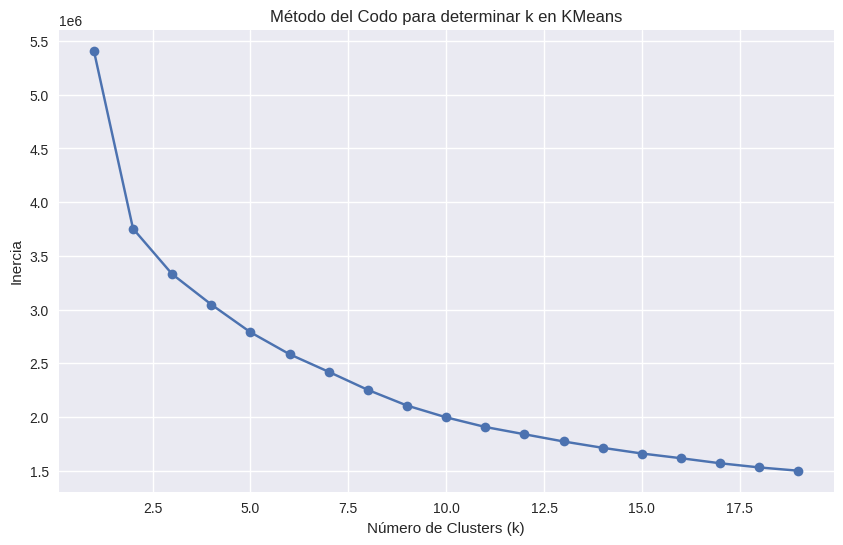

In [278]:
#aplico metodo del codo para seleccionar el k

inertia = []
k_values = range(1, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar k en KMeans')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


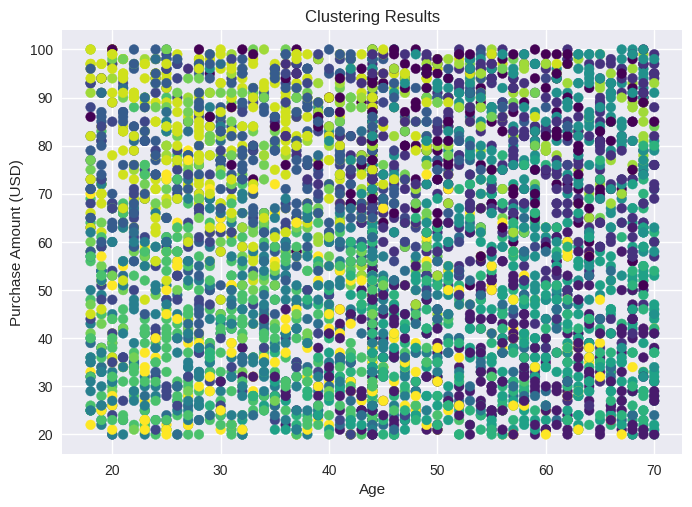

In [279]:
#Aplicacion de Kmeans con k=15 buscando agrupar en funcion de Edad y monto de compra


features = ['Age', 'Gender', 'Category', 'Location', 'Purchase Amount (USD)', 'Review Rating'   ]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[features])
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(scaled_features)

df_encoded['Cluster'] = kmeans.labels_

plt.scatter(df_encoded['Age'], df_encoded['Purchase Amount (USD)'], c=df_encoded['Cluster'], cmap='viridis')

plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Clustering Results')
plt.show()





## Conclusión del Método del Codo y Resultados de la clusterizacion

Observación del Gráfico del Codo: Al observar el gráfico de inercia frente al número de clusters (k), no se ve un "codo" claramente definido, lo que indica que no hay un punto óptimo evidente. Esto sugiere que la elección de k no es obvia y que cualquier número de clusters puede ser razonable en función de otros criterios o interpretaciones del negocio.

Selección de k=15: Aunque se seleccionó k=15,  según el gráfico del codo, no necesariamente el número óptimo.
Además, un número tan alto de clusters puede resultar en clusters no muy bien definidos, pero no logre observar cual seria el k ideal


*Análisis del Scatter Plot de la Clusterizacion*

El scatter plot muestra los resultados del clustering en función de la edad (Age) y el monto de compra (Purchase Amount (USD)).

Muchos Puntos y Clusters Poco Definidos: El gráfico muestra muchísimos puntos, y los clusters no están claramente definidos.

Podría deberse a varias razones:
Los datos no tienen una estructura de cluster natural para estas características.
La alta cantidad de clusters (15) puede estar generando ruido y no agrupando eficientemente los datos.
Las variables seleccionadas (Age y Purchase Amount (USD)) pueden no ser las mejores para visualizar clusters claros.


El dataset contiene más de 3000 filas, por lo que una opcion seria sintetizar el dataset para una mejor visualización.




# 4)Prediccion de Formas de Pago


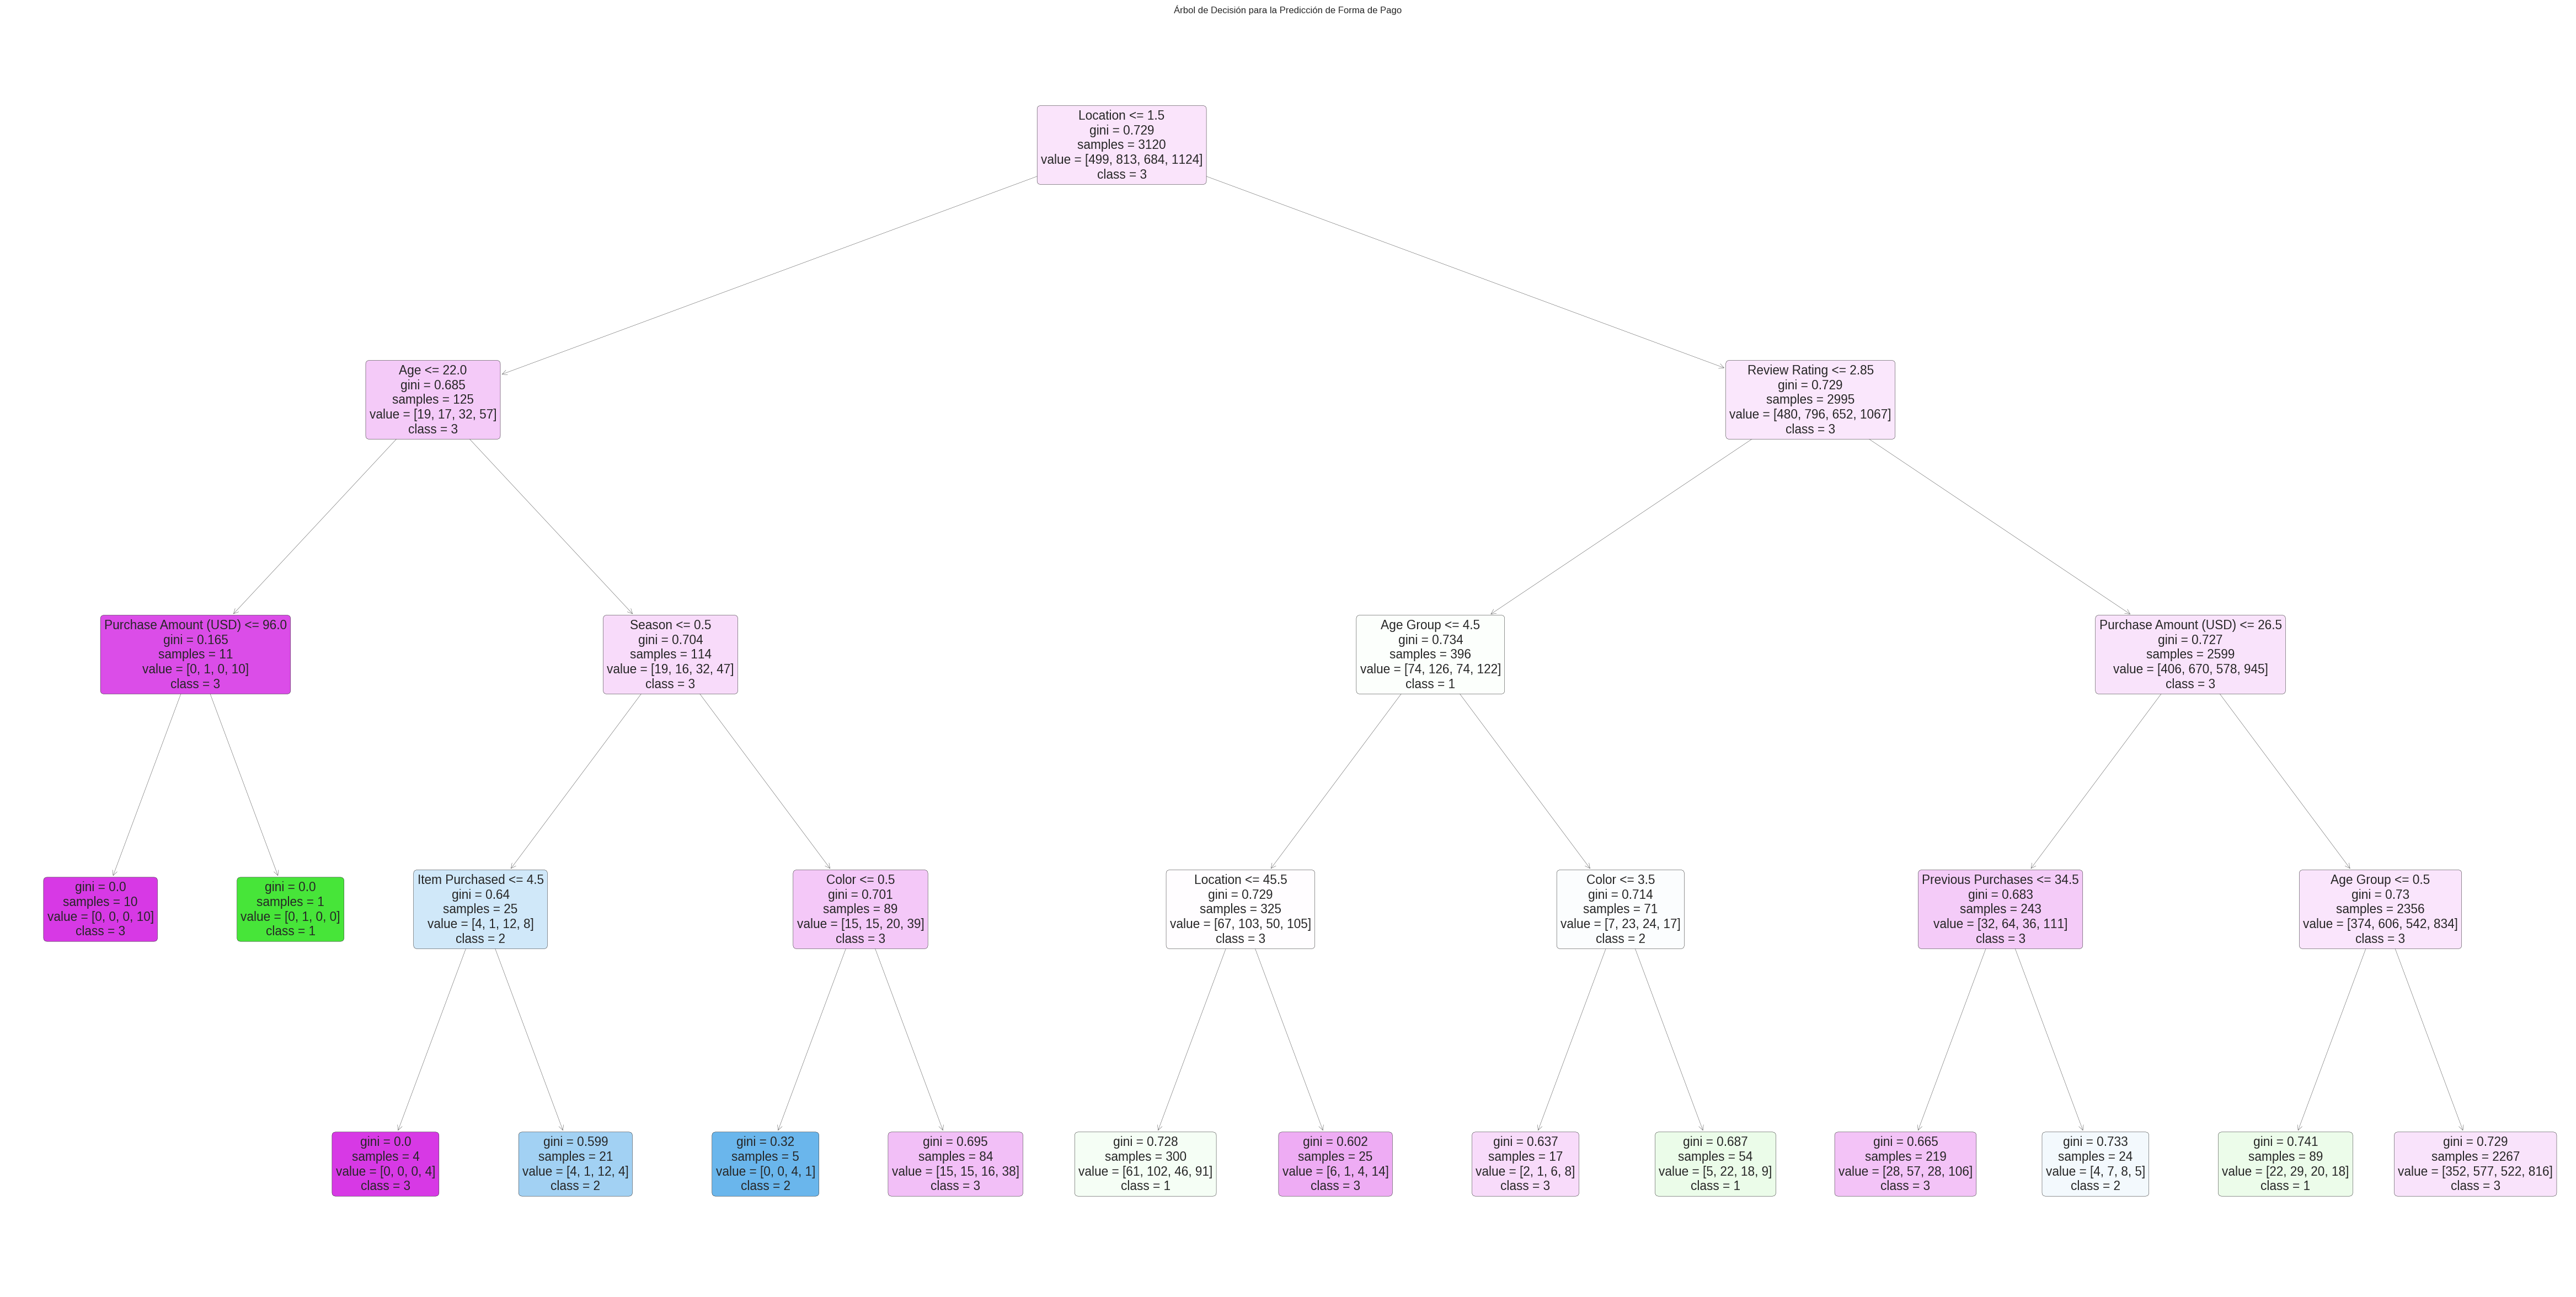

In [197]:
from sklearn.tree import plot_tree

X = df_encoded.drop(columns=['Payment Method'])  # Features
y = df_encoded['Payment Method']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=4, random_state=42)

model.fit(X_train, y_train)


plt.figure(figsize=(60, 30))
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_.astype(str), rounded=True)
plt.title('Árbol de Decisión para la Predicción de Forma de Pago')
plt.show()



In [198]:
# Calculo del Accuracy del test y del train

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy en el conjunto de prueba: {accuracy_test}')
print(f'Accuracy en el conjunto de entrenamiento: {accuracy_train}')


Accuracy en el conjunto de prueba: 0.34487179487179487
Accuracy en el conjunto de entrenamiento: 0.3762820512820513


In [199]:
from sklearn.metrics import precision_score

# Predicciones en el conjunto de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculo de precision del conjunto de prueba y entrenamiento, con zero_division para evitar advertencias
precision_test = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
precision_train = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)

print(f'Precision del conjunto de prueba: {precision_test}')
print(f'Precision del conjunto de entrenamiento: {precision_train}')


Precision del conjunto de prueba: 0.2529989265283383
Precision del conjunto de entrenamiento: 0.33225057530141305


In [200]:
# Calculo de sensibilidad (recall) del conjunto de prueba y entrenamiento
recall_test = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall_train = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)

print(f'Sensibilidad (Recall) del conjunto de prueba: {recall_test}')
print(f'Sensibilidad (Recall) del conjunto de entrenamiento: {recall_train}')

Sensibilidad (Recall) del conjunto de prueba: 0.34487179487179487
Sensibilidad (Recall) del conjunto de entrenamiento: 0.3762820512820513


In [201]:
# Calculo de F1 score del conjunto de prueba y entrenamiento
f1_test = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
f1_train = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

print(f'F1 score del conjunto de prueba: {f1_test}')
print(f'F1 score del conjunto de entrenamiento: {f1_train}')


F1 score del conjunto de prueba: 0.2331430692566173
F1 score del conjunto de entrenamiento: 0.2695534238663818


## Conclusion del arbol para predecir forma de pago

- Accuracy (Exactitud):

Conjunto de prueba: El modelo  acierta aproximadamente el 34.49% de las veces en la predicción de la forma de pago en el conjunto de datos de prueba.
Conjunto de entrenamiento: La exactitud es del 37.63% en el conjunto de entrenamiento, lo que indica que el modelo tiene un desempeño similar en los datos con los que fue entrenado.

 - Precision:

Conjunto de prueba: La precisión es del 25.30%, lo que sugiere que de todas las predicciones positivas que hizo el modelo para la forma de pago en el conjunto de prueba, el 25.30% fueron realmente correctas.
Conjunto de entrenamiento: La precisión es del 33.23% en el conjunto de entrenamiento, lo cual es ligeramente mayor que en el conjunto de prueba.

- Sensibilidad (Recall):

Conjunto de prueba: La sensibilidad es del 34.49%, lo que significa que el modelo identificó correctamente el 34.49% de todas las instancias de forma de pago positivo en el conjunto de prueba.
Conjunto de entrenamiento: La sensibilidad es del 37.63% en el conjunto de entrenamiento, lo cual indica que el modelo identifica un porcentaje similar de casos positivos en los datos de entrenamiento.

- F1-score:

Conjunto de prueba: El F1-score ponderado es del 23.31%, que es una métrica que combina precisión y sensibilidad. Un F1-score más bajo puede indicar dificultades en el equilibrio entre precisión y sensibilidad.

Conjunto de entrenamiento: El F1-score ponderado es del 26.96% en el conjunto de entrenamiento, ligeramente superior al del conjunto de prueba.

En resumen, los resultados del modelo de árbol de decisión para la predicción de la forma de pago muestran un desempeño limitado, con métricas de evaluación relativamente bajas tanto en el conjunto de prueba como en el conjunto de entrenamiento.
Esto sugiere que el modelo puede no estar capturando efectivamente las relaciones entre las variables de entrada y la forma de pago, lo cual podría requerir ajustes en la selección de características, optimización de hiperparámetros o consideración de modelos más avanzados para mejorar las predicciones.

# 5) Prediccion de Rating Review


MAE (Train): 0.5910006475331742, MSE (Train): 0.48108797567197137, R2 (Train): 0.04685363585245117
MAE (Test): 0.6163114552723729, MSE (Test): 0.508685543758565, R2 (Test): 0.0670780107299287


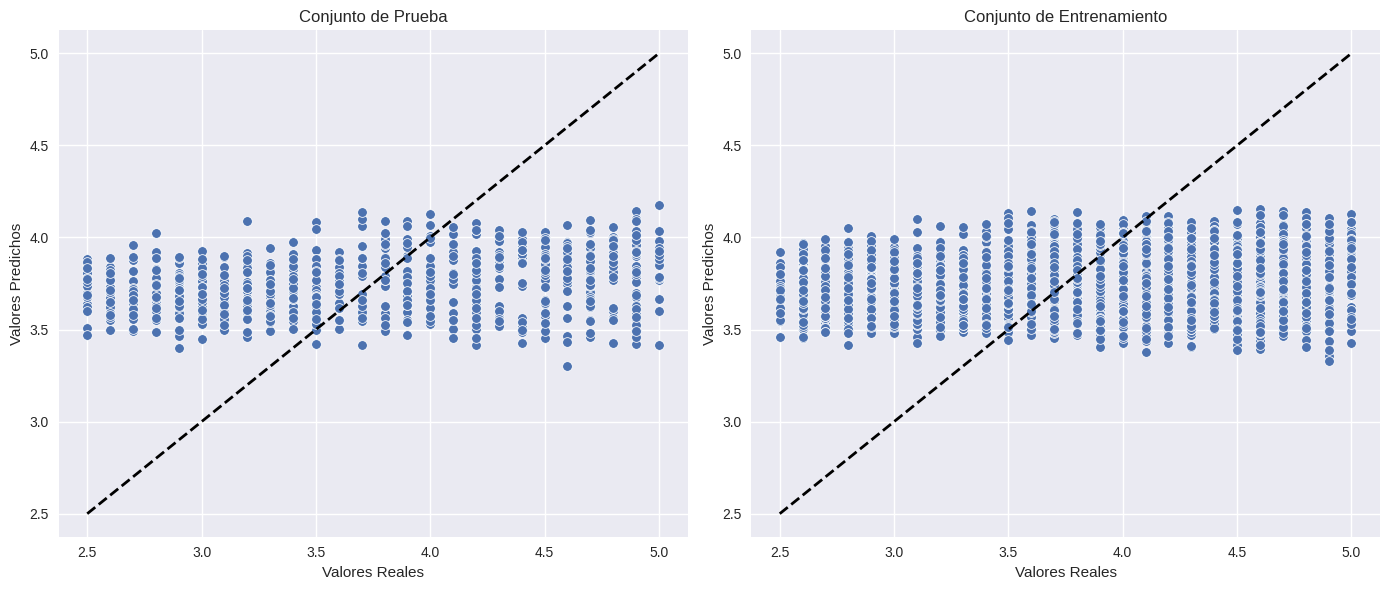

In [202]:

X = df_encoded.drop(columns=['Review Rating'])
y = df_encoded['Review Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Entrenamiento
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test)

# Predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# Evaluar el modelo en el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Evaluar el modelo en el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Mostrar resultados de evaluación
print(f'MAE (Train): {mae_train}, MSE (Train): {mse_train}, R2 (Train): {r2_train}')
print(f'MAE (Test): {mae_test}, MSE (Test): {mse_test}, R2 (Test): {r2_test}')

# Graficar resultados

# Gráfico de dispersión para el conjunto de prueba
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Conjunto de Prueba')

# Gráfico de dispersión para el conjunto de entrenamiento
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_train, y=y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Conjunto de Entrenamiento')

plt.tight_layout()
plt.show()


## Interpretacion de las metricas obtenidas

- MAE (Error Absoluto Medio):

Conjunto de Entrenamiento: 0.591
Conjunto de Prueba: 0.616
El MAE representa la magnitud promedio de los errores en las predicciones del modelo. Tanto en el conjunto de entrenamiento como en el de prueba, el MAE indica que las predicciones tienden a desviarse en promedio por aproximadamente 0.59 y 0.62 unidades del rating review real, respectivamente.

- MSE (Error Cuadrático Medio):

Conjunto de Entrenamiento: 0.481
Conjunto de Prueba: 0.509
El MSE mide la magnitud promedio de los errores al cuadrado, lo cual penaliza más los errores grandes. Los valores obtenidos indican que los errores en las predicciones tienen una magnitud considerable, aunque varían menos que el MAE.

 - R2 (Coeficiente de Determinación):

Conjunto de Entrenamiento: 0.047
Conjunto de Prueba: 0.067
El R2 es una medida de cuánto varía la variable dependiente (rating review) debido a las variaciones en la variable independiente (características de las compras). Un valor más cercano a 1 indica un mejor ajuste del modelo a los datos. En este caso, los valores de R2 son muy bajos, lo que sugiere que el modelo de regresión lineal no explica bien la variabilidad en los datos de rating review.

**CONCLUSION**

El modelo de regresión lineal parece tener un desempeño limitado para predecir el rating review de las compras. Las métricas de evaluación (MAE, MSE, R2) indican que las predicciones tienen un error promedio moderado y explican una pequeña fracción de la variabilidad en los datos de rating review.

**Interpretación de los Gráficos:**

En ambos graficos de observa dispersión de los conjuntos, los puntos dispersos alrededor de la línea diagonal muestran que las predicciones del modelo no coinciden bien con los valores reales.
Esto indica que el modelo tiene dificultades para ajustarse correctamente.


#**CONCLUSION FINAL**


Tras la aplicación de cinco tipos diferentes de algoritmos de Machine Learning a diversas variables del dataset, incluyendo regresión, clusterización y clasificación, he llegado a la conclusión, basándome en la evaluación de gráficos y métricas, de que ninguno logra alcanzar un rendimiento suficiente como para considerarlo un modelo confiable para implementación.

En todos los casos, es necesario regresar al proceso de Ingeniería de Datos para optimizar el dataset. Esto podría implicar la adición de columnas calculadas que agrupen información relevante o la síntesis del dataset para obtener insights más claros y concretos.

Posteriormente, se debe continuar con el proceso de selección del algoritmo, entrenamiento, interpretación de resultados y conclusiones.

Personalmente, aunque no he conseguido desarrollar un modelo que prediga correctamente los datos, considero que he explorado, depurado y aplicado modelos de ML con el objetivo de obtener estos datos valiosos. Me siento satisfecha con los resultados obtenidos en este primer acercamiento al fascinante mundo del Data Science.

Agradezco sinceramente por haber revisado mi primer proyecto. El camino a seguir implica avanzar y asimilar conceptos que me permitan crear proyectos de Data Science aún más valiosos en el futuro.

¡Muchas gracias!



